# Expected Points

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import simpledialog
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [148]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Arc
from sklearn import metrics

from functools import reduce

In [149]:
pd.set_option('display.max_rows', 400)

In [150]:
folder_path = '~/Documents/GAA Analytics/2023/'

In [151]:
df = pd.read_excel(folder_path + "Football_Championship_2023_Shots.xlsx")

In [152]:
df

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y
0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634
1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227
2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445
3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422
4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,Dean Rock,26,forward,right,n,42.10,36.790856,64.456948,108.209144,23.543052
1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,Paul Mannion,11,forward,left,y,7.87,5.730524,38.600986,139.269476,49.399014
1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,Dean Rock,26,forward,right,n,31.64,26.844570,60.737940,118.155430,27.262060
1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,Sean O'Shea,11,forward,right,n,17.38,130.320843,53.299923,130.320843,53.299923


### Remove Goals

In [153]:
df = df[~df['Action'].str.contains('goal')]

### Add Value to scores

In [154]:
df['Score'] = np.where((df['Outcome'] == 'Score'), 1, 0)

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/1201436192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score'] = np.where((df['Outcome'] == 'Score'), 1, 0)


In [155]:
df.head()

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score
0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1
1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1
2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1
3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1
4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1


### Preferred side

In [156]:
def is_preferable_side(y, foot):
    preferable_side = 0
    side = 'center'
    if (y<44):
        side = 'left'
    elif (y>44):
        side = 'right'
        
    if ((side=='left') & (foot=='right')) | ((side=='right') & (foot=='left')) | ((side=='right') & (foot=='hand')) | ((side=='left') & (foot=='hand')):
        preferable_side = 1
    
    return preferable_side

In [157]:
df['Preferred_Side'] = df.apply(lambda row:is_preferable_side(row['stand_y'], row['Foot']), axis=1)

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/930038391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Preferred_Side'] = df.apply(lambda row:is_preferable_side(row['stand_y'], row['Foot']), axis=1)


In [158]:
df

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,...,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side
0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,...,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1
1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,...,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,0
2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,...,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1
3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,...,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0
4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,...,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,Dean Rock,...,forward,right,n,42.10,36.790856,64.456948,108.209144,23.543052,0,1
1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,Paul Mannion,...,forward,left,y,7.87,5.730524,38.600986,139.269476,49.399014,1,1
1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,Dean Rock,...,forward,right,n,31.64,26.844570,60.737940,118.155430,27.262060,1,1
1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,Sean O'Shea,...,forward,right,n,17.38,130.320843,53.299923,130.320843,53.299923,1,0


### Add Values to Variables

In [159]:
df['Pressure_Value'] = df['Pressure'].replace({'y': 1, 'n': 0})
df['Position_Value'] = df['Position'].replace({'goalkeeper': 0, 'back': 1, 'midfielder': 2, 'forward': 3})
df['Foot_Value'] = df['Foot'].replace({'right': 0, 'left': 1, 'hand': 2})

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/1849771615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pressure_Value'] = df['Pressure'].replace({'y': 1, 'n': 0})
/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/1849771615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position_Value'] = df['Position'].replace({'goalkeeper': 0, 'back': 1, 'midfielder': 2, 'forward': 3})
/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/1849771615.py:3: Set

In [160]:
df.head()

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,...,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value
0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,...,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0
1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,...,34.85,14.972200,75.464773,130.027800,12.535227,1,0,0,3,1
2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,...,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2
3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,...,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0
4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,...,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1


### Calculate the Shot Angle

In [161]:
for index, row in df.iterrows():
    shot_x, shot_y = row['stand_x'], row['stand_y']
    goal_x, goal_y = 145, 44  # Assuming constant goal coordinates
    
    # Calculate the differences in x and y coordinates
    delta_x = goal_x - shot_x
    delta_y = goal_y - shot_y
    
    # Calculate the angle using arctan2 function
    angle_radians = np.arctan2(delta_y, delta_x)
    
    # Convert angle from radians to degrees
    angle_degrees = np.degrees(angle_radians)
    
    # Store the angle in the DataFrame
    df.at[index, 'Shot_Angle'] = angle_degrees

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/2656598753.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, 'Shot_Angle'] = angle_degrees


### Placed Balls

In [162]:
df['Placed_Ball'] = np.where((df['Action'] == 'point') | (df['Action'] == 'blocked')
                             | (df['Action'] == 'post') | (df['Action'] == 'short')
                             | (df['Action'] == 'wide'), 0, 1)


/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/3584912671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Placed_Ball'] = np.where((df['Action'] == 'point') | (df['Action'] == 'blocked')


## Using Logistic Regression to find xPoint

In [163]:
X_cols = ['Preferred_Side', 'Pressure_Value', 'Position_Value',
       'Foot_Value', 'Shot_Angle', 'Shot_Distance', 'Placed_Ball']

X = df[X_cols]
y = df['Score']

adv_model = LogisticRegression()
adv_model.fit(X, y)
y_pred = adv_model.predict_proba(X)[:, 1]
metrics.r2_score(y, y_pred)

/Users/cathalmcconnell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.15138314262426555

In [164]:
df['xP_adv'] = y_pred

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/4211576380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xP_adv'] = y_pred


In [165]:
df

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,...,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv
0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,...,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616
1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,...,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316
2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,...,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633
3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,...,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563
4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,...,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,Dean Rock,...,108.209144,23.543052,0,1,0,3,0,29.075525,0,0.450275
1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,Paul Mannion,...,139.269476,49.399014,1,1,1,3,1,-43.293866,0,0.840780
1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,Dean Rock,...,118.155430,27.262060,1,1,0,3,0,31.944078,1,0.846579
1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,Sean O'Shea,...,130.320843,53.299923,1,0,0,3,0,-32.356145,1,0.944841


In [166]:
X_cols = ['Preferred_Side', 'Pressure_Value', 'Position_Value', 'Foot_Value', 'Shot_Angle', 'Shot_Distance', 'Placed_Ball']

# Calculate the correlation matrix
correlation_matrix = df[X_cols + ['Score']].corr()

# Extract the correlation values for Score
score_correlation = correlation_matrix['Score'].sort_values()

# Print the correlation values
print(score_correlation)


Shot_Distance    -0.257819
Pressure_Value   -0.163950
Preferred_Side   -0.040551
Shot_Angle       -0.014618
Foot_Value        0.043499
Position_Value    0.122613
Placed_Ball       0.224109
Score             1.000000
Name: Score, dtype: float64


In [167]:
X_cols = ['Preferred_Side', 'Pressure_Value', 'Position_Value', 'Foot_Value', 'Shot_Angle', 'Shot_Distance', 'Placed_Ball']

# Calculate the correlation matrix
correlation_matrix = df[X_cols + ['xP_adv']].corr()

# Extract the correlation values for Score
score_correlation = correlation_matrix['xP_adv'].sort_values()



# Print the correlation values
print(score_correlation)


Shot_Distance    -0.651396
Pressure_Value   -0.408075
Preferred_Side   -0.102474
Shot_Angle       -0.036857
Foot_Value        0.110938
Position_Value    0.308784
Placed_Ball       0.554755
xP_adv            1.000000
Name: xP_adv, dtype: float64


### Using CBR to calculate xPoints

In [168]:
#Distance around the query point

space_threshold = 2

In [169]:
df.iloc[1121]

Unnamed: 0                        630
Date              2023-07-30 00:00:00
Game                All Ireland Final
TeamName                       Dublin
Opposition                      Kerry
Half                              2nd
Minute                             70
Action                           free
Outcome                         Score
PlayerName                  Dean Rock
PlayerNumber                       26
Position                      forward
Foot                            right
Pressure                            n
Shot_Distance                   31.64
x                            26.84457
y                            60.73794
stand_x                     118.15543
stand_y                      27.26206
Score                               1
Preferred_Side                      1
Pressure_Value                      0
Position_Value                      3
Foot_Value                          0
Shot_Angle                  31.944078
Placed_Ball                         1
xP_adv      

In [170]:
def find_similar_points(index):
    query = df.iloc[index]

    similar_area = df[(df.stand_x > query.stand_x - space_threshold) & (df.stand_x < query.stand_x + space_threshold) & (df.stand_y > query.stand_y - space_threshold) & (df.stand_y < query.stand_y + space_threshold)]

   
    return similar_area

find_similar_points(1121)

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,...,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv
18,65,2023-05-07,Connaught Final,Galway,Sligo,1st,33,point,Score,Ian burke,...,118.099482,26.763474,1,1,1,3,0,32.649746,0,0.476304
115,524,2023-05-14,Leinster Final,Dublin,Louth,1st,16,point,Score,Sean Bulger,...,119.844444,28.955033,1,1,0,3,0,30.882687,0,0.682447
132,541,2023-05-14,Leinster Final,Louth,Dublin,1st,35,point,Score,Craig Lennon,...,116.766085,29.115806,1,1,0,3,0,27.797046,0,0.638982
181,1110,2023-05-14,Ulster Final,Derry,Armagh,1st,16,point,Score,Brendan Rogers,...,116.591589,27.942547,1,1,1,2,0,29.476691,0,0.415966
349,155,2023-05-27,All Ireland Group R1,Monaghan,Derry,1st,6,point,Score,Gary Mohan,...,118.511047,26.835699,1,1,1,3,0,32.942414,0,0.483585
571,440,2023-06-03,All Ireland Group R2,Dublin,Kildare,2nd,40,wide,Miss,Dean Rock,...,116.310895,25.324572,0,1,1,3,0,33.062473,0,0.433508
691,363,2023-06-17,All Ireland Group R3,Donegal,Monaghan,1st,14,point,Score,Daire O Baoill,...,117.881361,25.678763,1,1,1,3,0,34.042793,0,0.461277
715,387,2023-06-17,All Ireland Group R3,Donegal,Monaghan,2nd,44,short,Miss,Conor O'Donnell,...,118.205679,28.850162,0,0,0,3,1,29.484350,0,0.624345
748,10,2023-06-18,All Ireland Group R3,Mayo,Cork,1st,22,point,Score,Jordan Flynn,...,119.078160,26.193728,1,1,1,3,0,34.486014,0,0.485271
935,200,2023-07-01,All Ireland Quarter Final,Monaghan,Armagh,1st,78,free,Score,Conor McManus,...,117.795892,28.939435,1,1,0,3,0,28.969512,1,0.852279


### Calculate the mean of the points around the query

In [171]:
def get_mean_score(neighbours):
    mean = neighbours.Score.mean() 
    return mean
    
# Show sample output    
neighbours = find_similar_points(74)
get_mean_score(neighbours)

0.4166666666666667

### Apply this to all rows

In [172]:
def update_rows(row):
    index = int(row['xPoints'])

    neighbours = find_similar_points(index)
    row['xPoints'] = get_mean_score(neighbours)
    row['Neighbour_Points'] = len(neighbours)

    return row

In [173]:
num_of_points = df.Action.count()
filler_data = np.arange(0.0, num_of_points)
df1 = pd.DataFrame({'xPoints':filler_data})

df1 = df1.apply(lambda row: update_rows(row), axis=1)
df1 = df1[['xPoints', 'Neighbour_Points']]
df1

,xPoints,Neighbour_Points
0,0.428571,7.0
1,0.500000,2.0
2,0.750000,4.0
3,0.666667,6.0
4,0.333333,6.0
...,...,...
1119,0.400000,10.0
1120,0.600000,5.0
1121,0.833333,12.0
1122,0.750000,16.0


In [174]:
df.head()

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,...,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv
0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,...,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616
1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,...,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316
2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,...,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633
3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,...,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563
4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,...,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032


In [175]:
df = df.reset_index()

In [176]:
df.head()

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032


In [177]:
df2 = df.join(df1)

In [178]:
df2

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xPoints,Neighbour_Points
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,1,1,0,3,0,27.937192,0,0.455616,0.428571,7.0
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,1,0,0,3,1,64.553022,1,0.783316,0.500000,2.0
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,1,1,0,1,2,-55.190701,0,0.779633,0.750000,4.0
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,1,0,0,3,0,-19.507410,0,0.500563,0.666667,6.0
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,1,1,1,3,1,-61.490704,0,0.488032,0.333333,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,...,0,1,0,3,0,29.075525,0,0.450275,0.400000,10.0
1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,...,1,1,1,3,1,-43.293866,0,0.840780,0.600000,5.0
1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,...,1,1,0,3,0,31.944078,1,0.846579,0.833333,12.0
1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,...,1,0,0,3,0,-32.356145,1,0.944841,0.750000,16.0


In [179]:
df2.groupby('Neighbour_Points').count()

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xPoints
Neighbour_Points,,,,,,,,,,,,,,,,,,,,,
1.0,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
2.0,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
3.0,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
4.0,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
5.0,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
6.0,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
7.0,87,87,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
8.0,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
9.0,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76


### Remove all Points with less than 3 neighbours

In [180]:
#df2 = df2[df2['Neighbour_Points'] > 3]

In [181]:
df2

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xPoints,Neighbour_Points
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,1,1,0,3,0,27.937192,0,0.455616,0.428571,7.0
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,1,0,0,3,1,64.553022,1,0.783316,0.500000,2.0
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,1,1,0,1,2,-55.190701,0,0.779633,0.750000,4.0
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,1,0,0,3,0,-19.507410,0,0.500563,0.666667,6.0
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,1,1,1,3,1,-61.490704,0,0.488032,0.333333,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,...,0,1,0,3,0,29.075525,0,0.450275,0.400000,10.0
1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,...,1,1,1,3,1,-43.293866,0,0.840780,0.600000,5.0
1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,...,1,1,0,3,0,31.944078,1,0.846579,0.833333,12.0
1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,...,1,0,0,3,0,-32.356145,1,0.944841,0.750000,16.0


### Plot Expected Point

In [182]:
x = df2.stand_x
y = df2.stand_y
value = df2.xP_adv

cats = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120',  '120-130', '130-140', '140-145']

bins = ([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 145], [0, 10, 20, 30, 40, 50, 60, 70, 80, 89])

sums, _, _ = np.histogram2d(x, y, bins=bins, weights=value)
counts, _, _ = np.histogram2d(x, y, bins=bins)
with  np.errstate(divide='ignore', invalid='ignore'):  # divide 0 by 0 results in NaN
    means = (sums / counts) 

test = pd.DataFrame(means)

test = test.T

test = test

In [183]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.280059,0.303167,0.254112,0.491443,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413226,0.472634,0.435456,0.509077,0.560141,0.483188
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.523249,0.419958,0.480114,0.620831,0.721377,0.724204
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.455643,0.491568,0.569683,0.767748,0.820813,0.777973
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.451082,0.434899,0.599795,0.754207,0.884781,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.558384,0.512410,0.607029,0.762734,0.827089,0.809439
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593115,0.425278,0.505751,0.640847,0.670467,0.825467
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.328678,0.474952,0.450729,0.529445,0.618787,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.529433,0.313810,0.493641,NaN,NaN


In [184]:
def draw_map1():

   # fig, ax = plt.subplots()
    fig=plt.figure()
    fig.set_size_inches(28, 24)
    ax=fig.add_subplot(1,1,1)
    


#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="grey")
    plt.plot([0,145],[88,88], color="grey")
    plt.plot([145,145],[88,0], color="grey")
    plt.plot([145,0],[0,0], color="grey")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="grey")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="grey")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="grey")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="grey")
    
            #large rectangle
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="grey",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="grey",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="grey")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="grey")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="grey")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="grey")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="grey")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="grey")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="grey")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="grey")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="grey")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="grey")
    
   # ly921 = [124,30] 
 #   lx921 = [0,30]
  #  plt.plot(lx921,color="grey")
    

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90, color="grey")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="grey")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    M = 9
    N = 15
    data = test
    


    c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.7, cmap=plt.cm.get_cmap('RdYlGn', 10))

    fig.colorbar(c, ax=ax, orientation = 'vertical')
   
    def show_values(pc, fmt="%.3f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.05):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
        
            ax.text(x, y, fmt % (value), ha="right", va="center", color="black", size=30, **kw)

  # Replace this with the actual total count of your data
    show_values(c)
    


    plt.axis('off')

    
    ax.set_title('Attacking >>>>>>>', fontsize = 40)


    plt.xlim(72.5, 145)
    
    #Display Pitch
    plt.show()
    


/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/2415968115.py:130: UserWarning: Warning: converting a masked element to nan.
  ax.text(x, y, fmt % (value), ha="right", va="center", color="black", size=30, **kw)


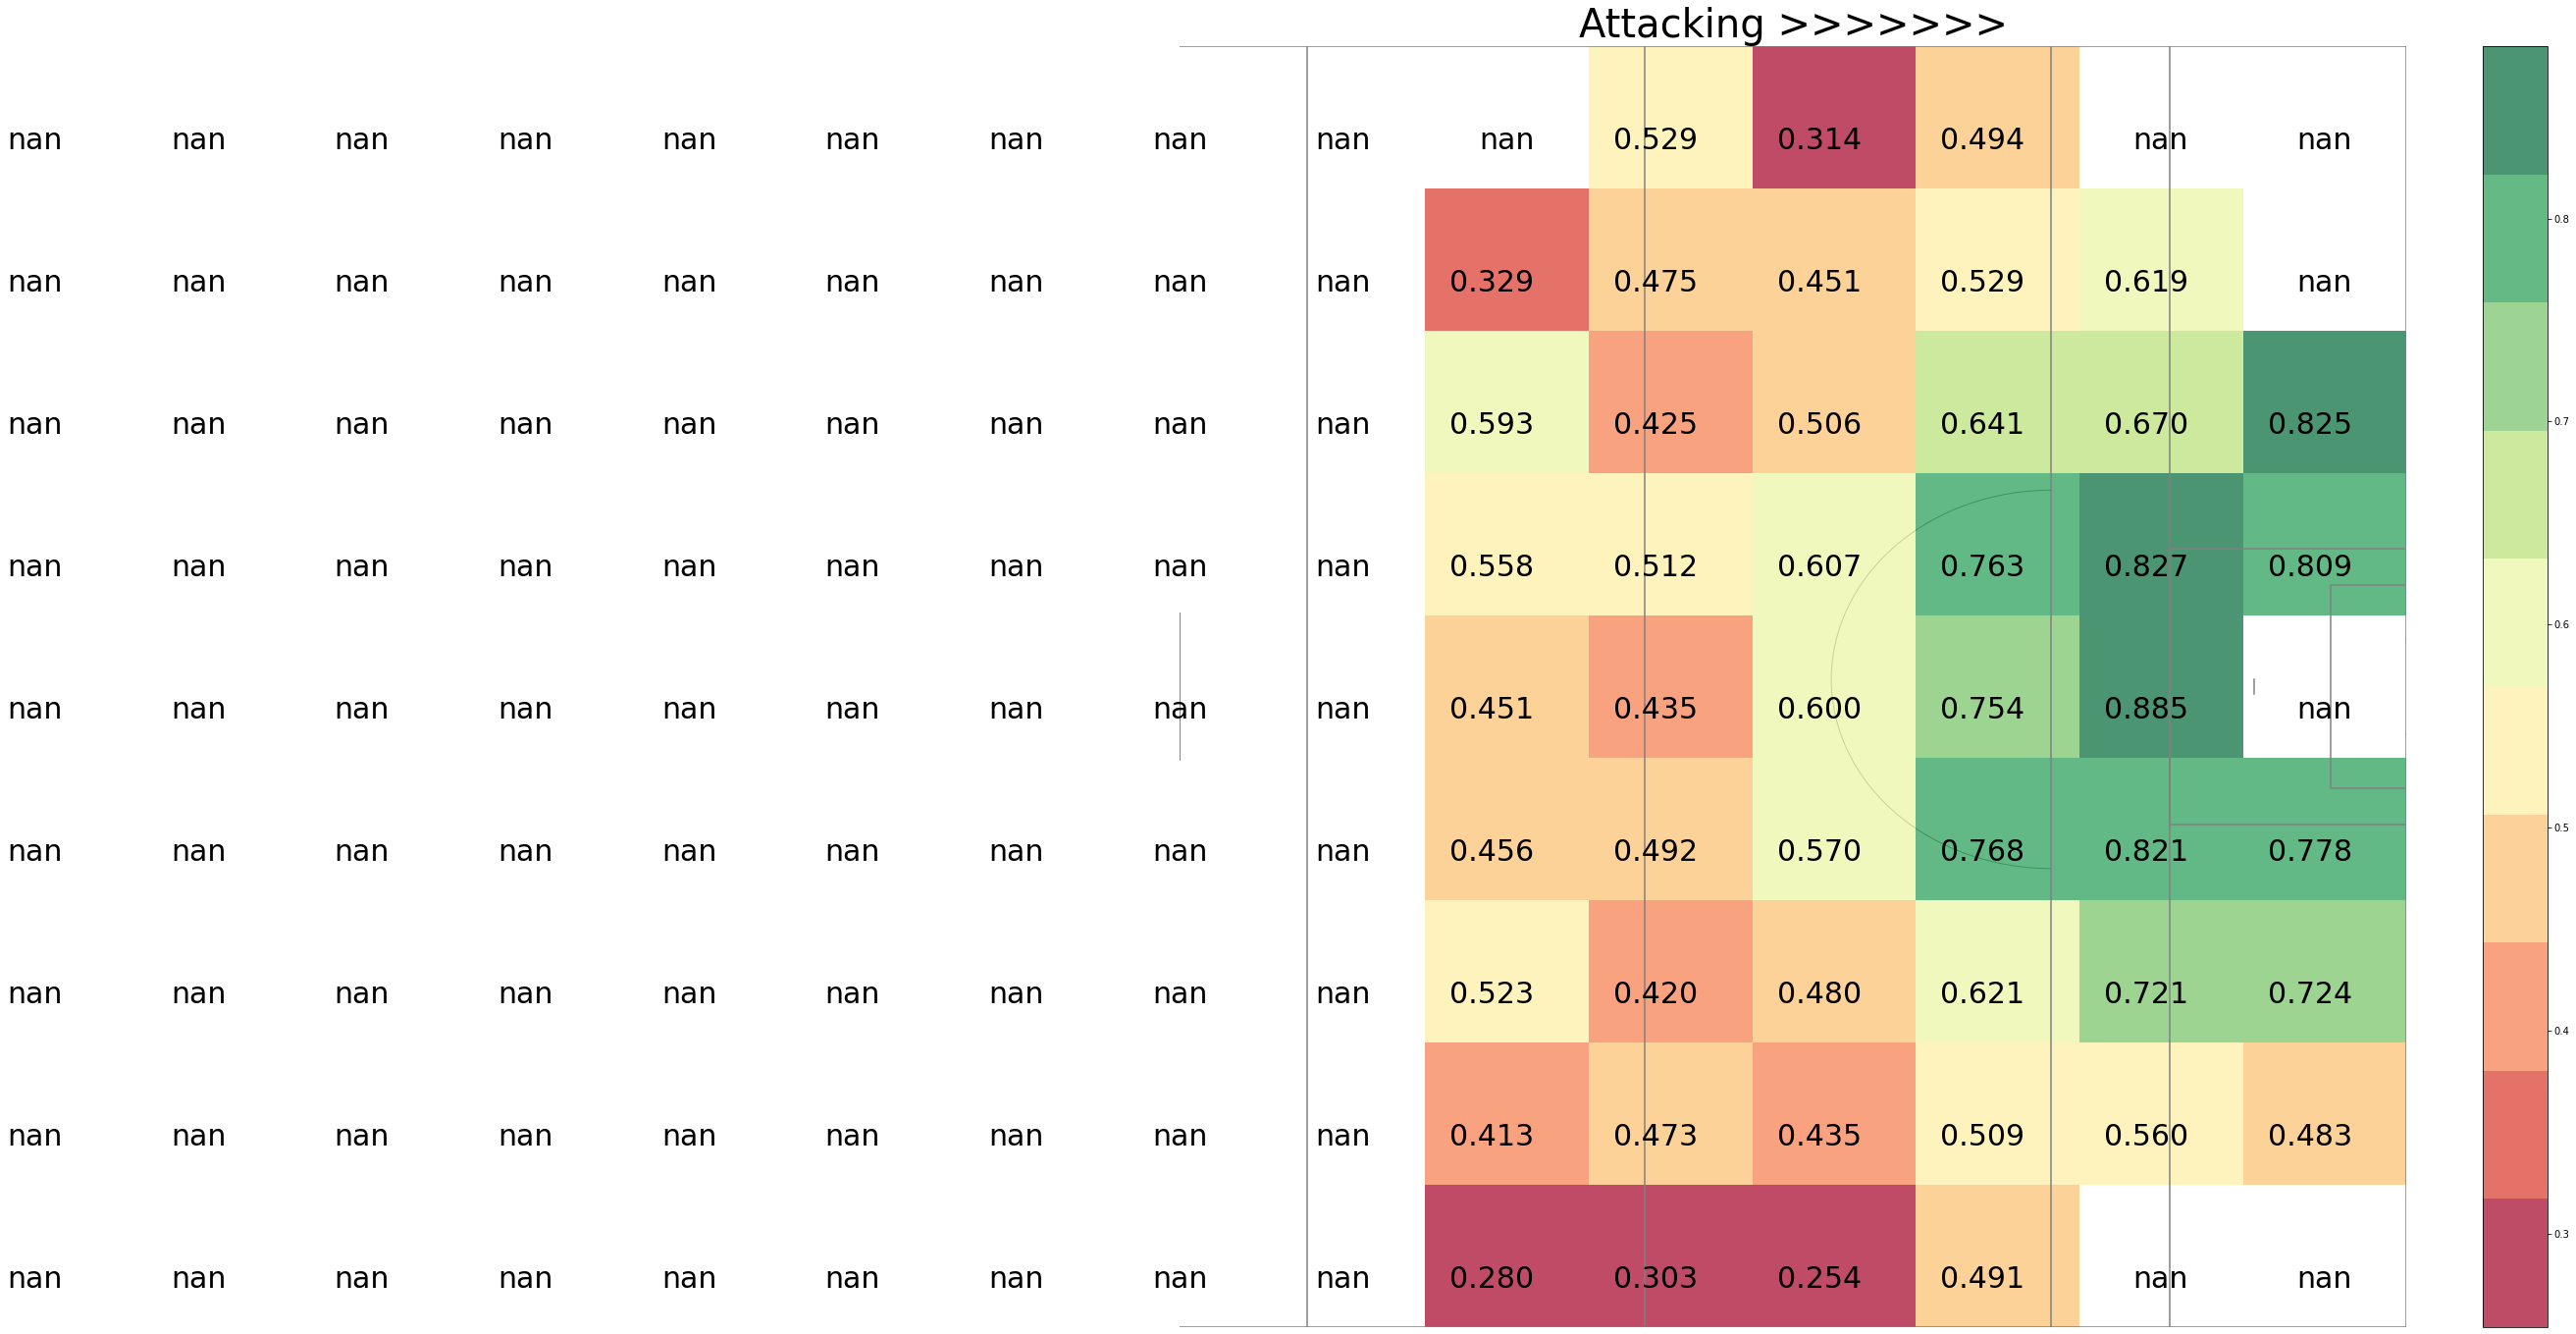

In [185]:
draw_map1()

## Compare xPoints with Actual Points per Player

In [186]:
df2

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xPoints,Neighbour_Points
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,1,1,0,3,0,27.937192,0,0.455616,0.428571,7.0
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,1,0,0,3,1,64.553022,1,0.783316,0.500000,2.0
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,1,1,0,1,2,-55.190701,0,0.779633,0.750000,4.0
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,1,0,0,3,0,-19.507410,0,0.500563,0.666667,6.0
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,1,1,1,3,1,-61.490704,0,0.488032,0.333333,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,...,0,1,0,3,0,29.075525,0,0.450275,0.400000,10.0
1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,...,1,1,1,3,1,-43.293866,0,0.840780,0.600000,5.0
1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,...,1,1,0,3,0,31.944078,1,0.846579,0.833333,12.0
1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,...,1,0,0,3,0,-32.356145,1,0.944841,0.750000,16.0


In [187]:
tm = df2.groupby('PlayerName').count()

In [188]:
tm.head()

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xPoints,Neighbour_Points
PlayerName,,,,,,,,,,,,,,,,,,,,,
Aaron Masterson,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Adrian Spillane,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Aidan Forker,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Aidan Nugent,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Aidan O'Shea,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [189]:
tm = tm[['Action']]

In [190]:
tm = tm.reset_index()

In [191]:
tm1 = df2.groupby('PlayerName').sum()

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/525100013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tm1 = df2.groupby('PlayerName').sum()


In [192]:
tm1 = tm1[['xP_adv', 'xPoints', 'Score']]

In [193]:
tm1.reset_index()

,PlayerName,xP_adv,xPoints,Score
0,Aaron Masterson,0.383900,0.727273,1
1,Adrian Spillane,2.577894,2.658333,3
2,Aidan Forker,1.927491,3.340326,3
3,Aidan Nugent,0.612019,0.357143,0
4,Aidan O'Shea,8.781465,8.151709,8
5,Alex Beirne,2.661950,2.869872,2
6,Andrew Murnin,3.000688,3.788990,4
7,Andrew Murning,1.636456,1.733333,2
8,Ben McCormack,4.337302,5.383826,7
9,Ben O'Carroll,0.526311,0.300000,0


In [194]:
merged_df = pd.merge(tm, tm1, on='PlayerName')

In [195]:
merged_df

,PlayerName,Action,xP_adv,xPoints,Score
0,Aaron Masterson,1,0.383900,0.727273,1
1,Adrian Spillane,4,2.577894,2.658333,3
2,Aidan Forker,6,1.927491,3.340326,3
3,Aidan Nugent,1,0.612019,0.357143,0
4,Aidan O'Shea,12,8.781465,8.151709,8
5,Alex Beirne,5,2.661950,2.869872,2
6,Andrew Murnin,5,3.000688,3.788990,4
7,Andrew Murning,2,1.636456,1.733333,2
8,Ben McCormack,8,4.337302,5.383826,7
9,Ben O'Carroll,1,0.526311,0.300000,0


In [196]:
md = merged_df.rename(columns={'Action': 'Shots'})

In [197]:
md = md[['PlayerName', 'Shots', 'Score', 'xP_adv', 'xPoints']]

In [198]:
md

,PlayerName,Shots,Score,xP_adv,xPoints
0,Aaron Masterson,1,1,0.383900,0.727273
1,Adrian Spillane,4,3,2.577894,2.658333
2,Aidan Forker,6,3,1.927491,3.340326
3,Aidan Nugent,1,0,0.612019,0.357143
4,Aidan O'Shea,12,8,8.781465,8.151709
5,Alex Beirne,5,2,2.661950,2.869872
6,Andrew Murnin,5,4,3.000688,3.788990
7,Andrew Murning,2,2,1.636456,1.733333
8,Ben McCormack,8,7,4.337302,5.383826
9,Ben O'Carroll,1,0,0.526311,0.300000


In [199]:
# Calculate the numerical difference between md.Score and md.xPoints
md['Difference'] = md['Score'] - md['xP_adv']

# Sort the DataFrame by the 'Difference' column in descending order
md = md.sort_values(by='Difference', ascending=False)

In [200]:
md

,PlayerName,Shots,Score,xP_adv,xPoints,Difference
66,David Clifford,52,36,30.677066,31.273406,5.322934
52,Cormac Costello,31,25,21.725858,21.336411,3.274142
91,Gary Mohan,11,9,6.128151,7.304906,2.871849
202,Shane McGuigan,32,26,23.189169,22.077976,2.810831
8,Ben McCormack,8,7,4.337302,5.383826,2.662698
136,Matthew Tierney,9,8,5.588699,4.886569,2.411301
194,Sean Bulger,9,8,5.647736,7.133231,2.352264
32,Colm Basquel,12,10,7.724688,8.370136,2.275312
13,Brian Fenton,7,6,3.753210,4.473856,2.246790
166,Paudie Clifford,8,7,4.803806,4.611169,2.196194


In [201]:
md = md.sort_values(by='Shots', ascending=False)

In [202]:
md = md.head(20)

In [203]:
md = md.sort_values(by='Difference', ascending=False)

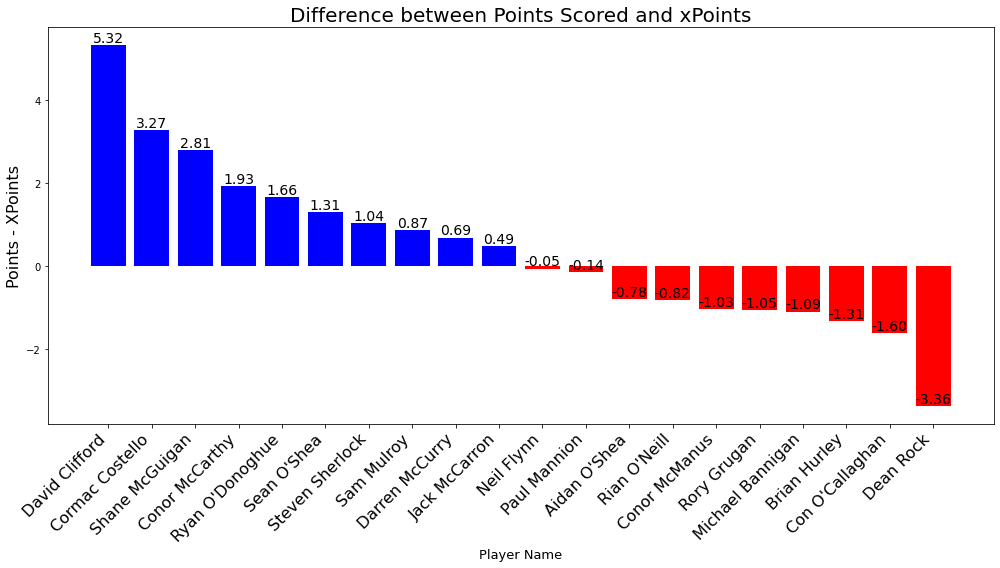

In [204]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the bar chart
bars = plt.bar(range(len(md)), md['Difference'], color=['blue' if x > 0 else 'red' for x in md['Difference']])

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom', fontsize=14)

# Set the title and labels
plt.title('Difference between Points Scored and xPoints', fontsize=20)
plt.xlabel('Player Name', fontsize=13)
plt.ylabel('Points - XPoints', fontsize=16)

# Set the x-axis labels
plt.xticks(range(len(md)), md['PlayerName'], rotation=45, ha='right', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


### Standardise - Divide xPoints and Points by the Shots

In [205]:
md

,PlayerName,Shots,Score,xP_adv,xPoints,Difference
66,David Clifford,52,36,30.677066,31.273406,5.322934
52,Cormac Costello,31,25,21.725858,21.336411,3.274142
202,Shane McGuigan,32,26,23.189169,22.077976,2.810831
45,Conor McCarthy,13,8,6.067111,8.257720,1.932889
189,Ryan O'Donoghue,22,18,16.337608,14.359083,1.662392
198,Sean O'Shea,32,24,22.692974,20.583820,1.307026
215,Steven Sherlock,13,9,7.960049,8.480877,1.039951
193,Sam Mulroy,17,13,12.132337,9.773784,0.867663
65,Darren McCurry,21,15,14.308079,12.556567,0.691921
100,Jack McCarron,18,11,10.506769,9.842651,0.493231


In [206]:
md['Points_per_Shot'] = md.Score / md.Shots

In [207]:
md['xPoints_per_Shot'] = md.xPoints / md.Shots

In [208]:
md

,PlayerName,Shots,Score,xP_adv,xPoints,Difference,Points_per_Shot,xPoints_per_Shot
66,David Clifford,52,36,30.677066,31.273406,5.322934,0.692308,0.601412
52,Cormac Costello,31,25,21.725858,21.336411,3.274142,0.806452,0.688271
202,Shane McGuigan,32,26,23.189169,22.077976,2.810831,0.812500,0.689937
45,Conor McCarthy,13,8,6.067111,8.257720,1.932889,0.615385,0.635209
189,Ryan O'Donoghue,22,18,16.337608,14.359083,1.662392,0.818182,0.652686
198,Sean O'Shea,32,24,22.692974,20.583820,1.307026,0.750000,0.643244
215,Steven Sherlock,13,9,7.960049,8.480877,1.039951,0.692308,0.652375
193,Sam Mulroy,17,13,12.132337,9.773784,0.867663,0.764706,0.574928
65,Darren McCurry,21,15,14.308079,12.556567,0.691921,0.714286,0.597932
100,Jack McCarron,18,11,10.506769,9.842651,0.493231,0.611111,0.546814


### Average xPoint per Shot per Player

In [209]:
md.sort_values(by='xPoints_per_Shot', ascending=False)

,PlayerName,Shots,Score,xP_adv,xPoints,Difference,Points_per_Shot,xPoints_per_Shot
181,Rory Grugan,16,11,12.052177,12.375075,-1.052177,0.687500,0.773442
202,Shane McGuigan,32,26,23.189169,22.077976,2.810831,0.812500,0.689937
52,Cormac Costello,31,25,21.725858,21.336411,3.274142,0.806452,0.688271
35,Con O'Callaghan,23,14,15.599607,15.783625,-1.599607,0.608696,0.686245
4,Aidan O'Shea,12,8,8.781465,8.151709,-0.781465,0.666667,0.679309
189,Ryan O'Donoghue,22,18,16.337608,14.359083,1.662392,0.818182,0.652686
215,Steven Sherlock,13,9,7.960049,8.480877,1.039951,0.692308,0.652375
198,Sean O'Shea,32,24,22.692974,20.583820,1.307026,0.750000,0.643244
45,Conor McCarthy,13,8,6.067111,8.257720,1.932889,0.615385,0.635209
140,Michael Bannigan,12,6,7.087965,7.579582,-1.087965,0.500000,0.631632


In [210]:
# Calculate the standard difference between md.Score and md.xPoints
md['Std_Difference'] = md['Points_per_Shot'] - md['xPoints_per_Shot']

# Sort the DataFrame by the 'Difference' column in descending order
md = md.sort_values(by='Std_Difference', ascending=False)

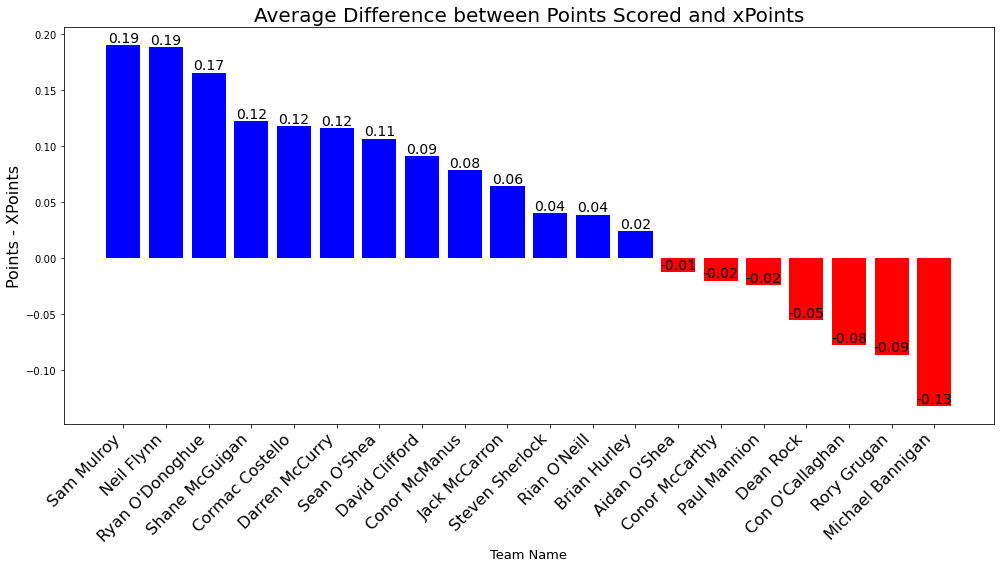

In [211]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the bar chart
bars = plt.bar(range(len(md)), md['Std_Difference'], color=['blue' if x > 0 else 'red' for x in md['Std_Difference']])

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom', fontsize=14)

# Set the title and labels
plt.title('Average Difference between Points Scored and xPoints', fontsize=20)
plt.xlabel('Team Name', fontsize=13)
plt.ylabel('Points - XPoints', fontsize=16)

# Set the x-axis labels
plt.xticks(range(len(md)), md['PlayerName'], rotation=45, ha='right', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


## Compare xPoints with Actual Points per Team

In [212]:
tm = df2.groupby('TeamName').count()

In [213]:
tm.head()

,index,Unnamed: 0,Date,Game,Opposition,Half,Minute,Action,Outcome,PlayerName,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xPoints,Neighbour_Points
TeamName,,,,,,,,,,,,,,,,,,,,,
Armagh,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
Clare,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
Cork,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
Derry,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
Donegal,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


In [214]:
tm = tm[['Action']]

In [215]:
tm = tm.reset_index()

In [216]:
tm1 = df2.groupby('TeamName').sum()

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/237283091.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tm1 = df2.groupby('TeamName').sum()


In [217]:
tm1 = tm1[['xPoints', 'xP_adv', 'Score']]

In [218]:
tm1.reset_index()

,TeamName,xPoints,xP_adv,Score
0,Armagh,60.983963,59.662663,57
1,Clare,16.134325,15.797676,15
2,Cork,42.145808,39.659594,37
3,Derry,57.436379,57.609687,56
4,Donegal,17.151718,15.537348,19
5,Dublin,103.974672,101.338241,104
6,Galway,30.014595,31.590716,36
7,Kerry,87.814196,88.730267,93
8,Kildare,26.595267,28.231058,26
9,Louth,23.339749,25.678672,25


In [219]:
merged_df = pd.merge(tm, tm1, on='TeamName')

In [220]:
merged_df

,TeamName,Action,xPoints,xP_adv,Score
0,Armagh,101,60.983963,59.662663,57
1,Clare,28,16.134325,15.797676,15
2,Cork,67,42.145808,39.659594,37
3,Derry,96,57.436379,57.609687,56
4,Donegal,27,17.151718,15.537348,19
5,Dublin,163,103.974672,101.338241,104
6,Galway,53,30.014595,31.590716,36
7,Kerry,147,87.814196,88.730267,93
8,Kildare,46,26.595267,28.231058,26
9,Louth,44,23.339749,25.678672,25


In [221]:
md = merged_df.rename(columns={'Action': 'Shots'})

In [222]:
md = md[['TeamName', 'Shots', 'Score', 'xP_adv', 'xPoints']]

In [223]:
md

,TeamName,Shots,Score,xP_adv,xPoints
0,Armagh,101,57,59.662663,60.983963
1,Clare,28,15,15.797676,16.134325
2,Cork,67,37,39.659594,42.145808
3,Derry,96,56,57.609687,57.436379
4,Donegal,27,19,15.537348,17.151718
5,Dublin,163,104,101.338241,103.974672
6,Galway,53,36,31.590716,30.014595
7,Kerry,147,93,88.730267,87.814196
8,Kildare,46,26,28.231058,26.595267
9,Louth,44,25,25.678672,23.339749


In [224]:
# Calculate the numerical difference between md.Score and md.xPoints
md['Difference'] = md['Score'] - md['xP_adv']

# Sort the DataFrame by the 'Difference' column in descending order
md = md.sort_values(by='Difference', ascending=False)

In [225]:
md

,TeamName,Shots,Score,xP_adv,xPoints,Difference
6,Galway,53,36,31.590716,30.014595,4.409284
7,Kerry,147,93,88.730267,87.814196,4.269733
4,Donegal,27,19,15.537348,17.151718,3.462652
5,Dublin,163,104,101.338241,103.974672,2.661759
13,Sligo,19,12,10.599669,11.777326,1.400331
14,Tyrone,66,38,36.922577,35.853487,1.077423
9,Louth,44,25,25.678672,23.339749,-0.678672
1,Clare,28,15,15.797676,16.134325,-0.797676
15,Westmeath,22,10,11.221468,11.595521,-1.221468
11,Monaghan,126,69,70.384515,73.974123,-1.384515


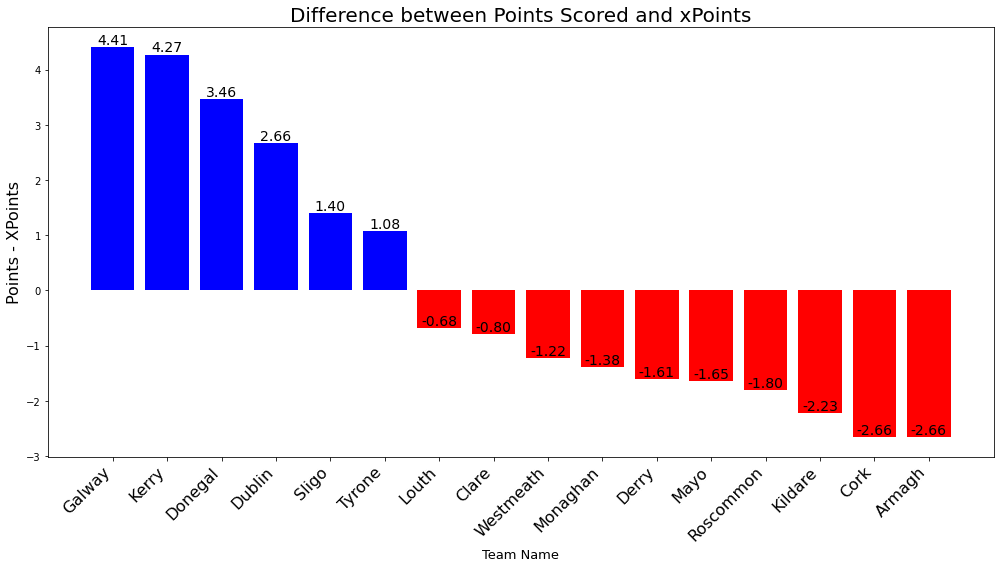

In [226]:


# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the bar chart
bars = plt.bar(range(len(md)), md['Difference'], color=['blue' if x > 0 else 'red' for x in md['Difference']])

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom', fontsize=14)

# Set the title and labels
plt.title('Difference between Points Scored and xPoints', fontsize=20)
plt.xlabel('Team Name', fontsize=13)
plt.ylabel('Points - XPoints', fontsize=16)

# Set the x-axis labels
plt.xticks(range(len(md)), md['TeamName'], rotation=45, ha='right', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


### Standardise - Divide xPoints and Points by the Shots

In [227]:
md

,TeamName,Shots,Score,xP_adv,xPoints,Difference
6,Galway,53,36,31.590716,30.014595,4.409284
7,Kerry,147,93,88.730267,87.814196,4.269733
4,Donegal,27,19,15.537348,17.151718,3.462652
5,Dublin,163,104,101.338241,103.974672,2.661759
13,Sligo,19,12,10.599669,11.777326,1.400331
14,Tyrone,66,38,36.922577,35.853487,1.077423
9,Louth,44,25,25.678672,23.339749,-0.678672
1,Clare,28,15,15.797676,16.134325,-0.797676
15,Westmeath,22,10,11.221468,11.595521,-1.221468
11,Monaghan,126,69,70.384515,73.974123,-1.384515


In [228]:
md['Points_per_Shot'] = md.Score / md.Shots

In [229]:
md['xPoints_per_Shot'] = md.xPoints / md.Shots

In [230]:
md

,TeamName,Shots,Score,xP_adv,xPoints,Difference,Points_per_Shot,xPoints_per_Shot
6,Galway,53,36,31.590716,30.014595,4.409284,0.679245,0.566313
7,Kerry,147,93,88.730267,87.814196,4.269733,0.632653,0.597375
4,Donegal,27,19,15.537348,17.151718,3.462652,0.703704,0.635249
5,Dublin,163,104,101.338241,103.974672,2.661759,0.638037,0.637881
13,Sligo,19,12,10.599669,11.777326,1.400331,0.631579,0.619859
14,Tyrone,66,38,36.922577,35.853487,1.077423,0.575758,0.543235
9,Louth,44,25,25.678672,23.339749,-0.678672,0.568182,0.530449
1,Clare,28,15,15.797676,16.134325,-0.797676,0.535714,0.576226
15,Westmeath,22,10,11.221468,11.595521,-1.221468,0.454545,0.527069
11,Monaghan,126,69,70.384515,73.974123,-1.384515,0.547619,0.587096


In [231]:
# Calculate the standard difference between md.Score and md.xPoints
md['Std_Difference'] = md['Points_per_Shot'] - md['xPoints_per_Shot']

# Sort the DataFrame by the 'Difference' column in descending order
md = md.sort_values(by='Std_Difference', ascending=False)

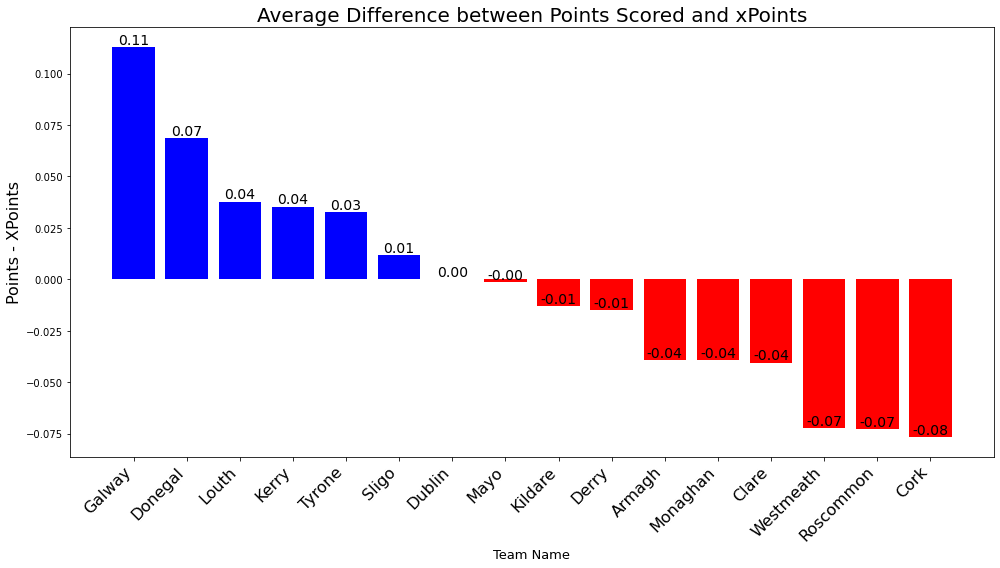

In [232]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the bar chart
bars = plt.bar(range(len(md)), md['Std_Difference'], color=['blue' if x > 0 else 'red' for x in md['Std_Difference']])

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom', fontsize=14)

# Set the title and labels
plt.title('Average Difference between Points Scored and xPoints', fontsize=20)
plt.xlabel('Team Name', fontsize=13)
plt.ylabel('Points - XPoints', fontsize=16)

# Set the x-axis labels
plt.xticks(range(len(md)), md['TeamName'], rotation=45, ha='right', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


### Average xP per team

In [248]:
df2

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xPoints,Neighbour_Points
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,1,1,0,3,0,27.937192,0,0.455616,0.428571,7.0
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,1,0,0,3,1,64.553022,1,0.783316,0.500000,2.0
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,1,1,0,1,2,-55.190701,0,0.779633,0.750000,4.0
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,1,0,0,3,0,-19.507410,0,0.500563,0.666667,6.0
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,1,1,1,3,1,-61.490704,0,0.488032,0.333333,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,...,0,1,0,3,0,29.075525,0,0.450275,0.400000,10.0
1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,...,1,1,1,3,1,-43.293866,0,0.840780,0.600000,5.0
1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,...,1,1,0,3,0,31.944078,1,0.846579,0.833333,12.0
1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,...,1,0,0,3,0,-32.356145,1,0.944841,0.750000,16.0


In [253]:
df2_avg = df2.groupby('TeamName').mean()

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/2620889752.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_avg = df2.groupby('TeamName').mean()


In [254]:
df2_avg = df2_avg[['xP_adv']].reset_index()

In [255]:
df2_avg = df2_avg.sort_values(by='xP_adv', ascending=False)

In [256]:
df2_avg

,TeamName,xP_adv
5,Dublin,0.621707
12,Roscommon,0.616784
8,Kildare,0.613719
10,Mayo,0.609115
7,Kerry,0.603607
3,Derry,0.600101
6,Galway,0.596051
2,Cork,0.591934
0,Armagh,0.590719
9,Louth,0.583606


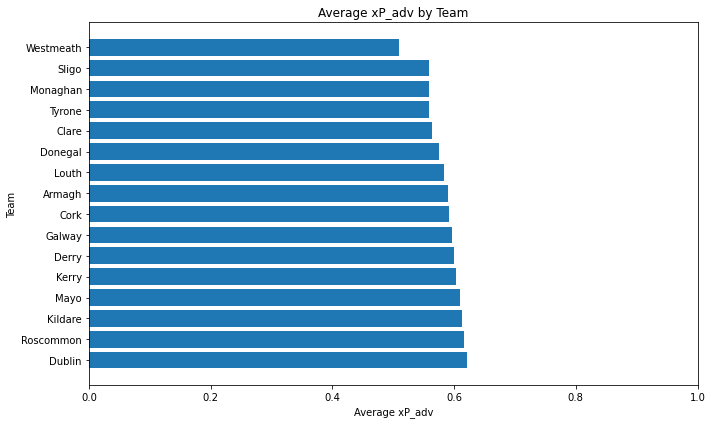

In [259]:

plt.figure(figsize=(10, 6))
plt.barh(df2_avg['TeamName'], df2_avg['xP_adv'])
plt.xlabel('Average xP_adv')
plt.ylabel('Team')
plt.title('Average xP_adv by Team')
plt.xlim(0, 1)  # Set y-axis limits from 0 to 1
plt.tight_layout()
plt.show()

In [261]:
df2_avg1 = df2.groupby('Opposition').mean()

df2_avg1 = df2_avg1[['xP_adv']].reset_index()

df2_avg1 = df2_avg1.sort_values(by='xP_adv', ascending=False)

df2_avg1

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/3579061094.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_avg1 = df2.groupby('Opposition').mean()


,Opposition,xP_adv
15,Westmeath,0.678762
9,Louth,0.675538
1,Clare,0.665168
12,Roscommon,0.629003
11,Monaghan,0.625219
8,Kildare,0.605294
14,Tyrone,0.603428
2,Cork,0.600636
5,Dublin,0.598606
13,Sligo,0.595338


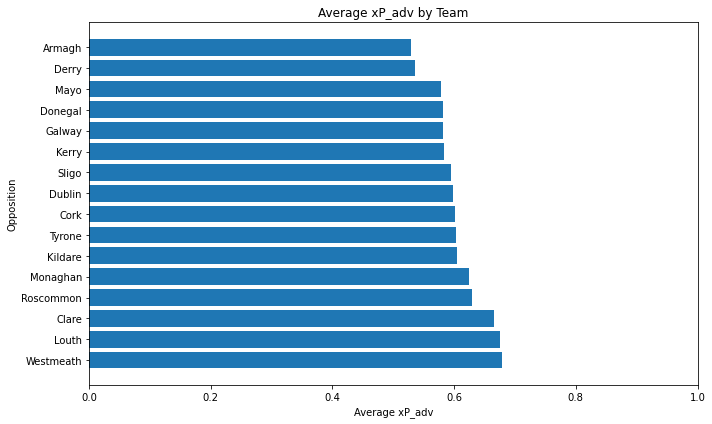

In [262]:
plt.figure(figsize=(10, 6))
plt.barh(df2_avg1['Opposition'], df2_avg1['xP_adv'])
plt.xlabel('Average xP_adv')
plt.ylabel('Opposition')
plt.title('Average xP_adv by Team')
plt.xlim(0, 1)  # Set y-axis limits from 0 to 1
plt.tight_layout()
plt.show()

## Compare xPoints with Actual Points per Game

In [87]:
df2

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xPoints,Neighbour_Points
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,1,1,0,3,0,27.937192,0,0.455616,0.428571,7.0
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,1,0,0,3,1,64.553022,1,0.783316,0.500000,2.0
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,1,1,0,1,2,-55.190701,0,0.779633,0.750000,4.0
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,1,0,0,3,0,-19.507410,0,0.500563,0.666667,6.0
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,1,1,1,3,1,-61.490704,0,0.488032,0.333333,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,...,0,1,0,3,0,29.075525,0,0.450275,0.400000,10.0
1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,...,1,1,1,3,1,-43.293866,0,0.840780,0.600000,5.0
1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,...,1,1,0,3,0,31.944078,1,0.846579,0.833333,12.0
1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,...,1,0,0,3,0,-32.356145,1,0.944841,0.750000,16.0


In [88]:
tm = df2.groupby(['Game', 'TeamName', 'Opposition']).count()

In [89]:
tm.head()

index  Unnamed: 0  Date  Half  \
Game                 TeamName Opposition                                  
All Ireland Final    Dublin   Kerry          27          27    27    27   
                     Kerry    Dublin         22          22    22    22   
All Ireland Group R1 Armagh   Westmeath      20          20    20    20   
                     Derry    Monaghan       20          20    20    20   
                     Dublin   Roscommon      24          24    24    24   

                                          Minute  Action  Outcome  PlayerName  \
Game                 TeamName Opposition                                        
All Ireland Final    Dublin   Kerry           27      27       27          27   
                     Kerry    Dublin          22      22       22          22   
All Ireland Group R1 Armagh   Westmeath       20      20       20          20   
                     Derry    Monaghan        20      20       20          20   
                     Dublin   Roscommon       24      24       24          24   

                                          PlayerNumber  Position  ...  Score  \
Game                 TeamName Opposition                          ...          
All Ireland Final    Dublin   Kerry                 27        27  ...     27   
                     Kerry    Dublin                22        22  ...     22   
All Ireland Group R1 Armagh   Westmeath             20        20  ...     20   
                     Derry    Monaghan              20        20  ...     20   
                     Dublin   Roscommon             24        24  ...     24   

                                          Preferred_Side  Pressure_Value  \
Game                 TeamName Opposition                                   
All Ireland Final    Dublin   Kerry                   27              27   
                     Kerry    Dublin                  22              22   
All Ireland Group R1 Armagh   Westmeath               20              20   
                     Derry    Monaghan                20              20   
                     Dublin   Roscommon               24              24   

                                          Position_Value  Foot_Value  \
Game                 TeamName Opposition                               
All Ireland Final    Dublin   Kerry                   27          27   
                     Kerry    Dublin                  22          22   
All Ireland Group R1 Armagh   Westmeath               20          20   
                     Derry    Monaghan                20          20   
                     Dublin   Roscommon               24          24   

                                          Shot_Angle  Placed_Ball  xP_adv  \
Game                 TeamName Opposition                                    
All Ireland Final    Dublin   Kerry               27           27      27   
                     Kerry    Dublin              22           22      22   
All Ireland Group R1 Armagh   Westmeath           20           20      20   
                     Derry    Monaghan            20           20      20   
                     Dublin   Roscommon           24           24      24   

                                          xPoints  Neighbour_Points  
Game                 TeamName Opposition                             
All Ireland Final    Dublin   Kerry            27                27  
                     Kerry    Dublin           22                22  
All Ireland Group R1 Armagh   Westmeath        20                20  
                     Derry    Monaghan         20                20  
                     Dublin   Roscommon        24                24  

[5 rows x 27 columns]

In [90]:
tm = tm[['Action']]

In [91]:
tm = tm.reset_index()

In [92]:
tm

,Game,TeamName,Opposition,Action
0,All Ireland Final,Dublin,Kerry,27
1,All Ireland Final,Kerry,Dublin,22
2,All Ireland Group R1,Armagh,Westmeath,20
3,All Ireland Group R1,Derry,Monaghan,20
4,All Ireland Group R1,Dublin,Roscommon,24
5,All Ireland Group R1,Galway,Tyrone,28
6,All Ireland Group R1,Kerry,Mayo,27
7,All Ireland Group R1,Mayo,Kerry,28
8,All Ireland Group R1,Monaghan,Derry,24
9,All Ireland Group R1,Roscommon,Dublin,24


In [93]:
tm1 = df2.groupby(['Game', 'TeamName', 'Opposition']).sum()

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/2245173284.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tm1 = df2.groupby(['Game', 'TeamName', 'Opposition']).sum()


In [94]:
tm1 = tm1[['xPoints', 'xP_adv', 'Score']]

In [95]:
tm1.reset_index()

,Game,TeamName,Opposition,xPoints,xP_adv,Score
0,All Ireland Final,Dublin,Kerry,16.810574,14.530770,15
1,All Ireland Final,Kerry,Dublin,11.756262,13.090084,13
2,All Ireland Group R1,Armagh,Westmeath,12.904603,13.575240,14
3,All Ireland Group R1,Derry,Monaghan,14.780762,13.397286,14
4,All Ireland Group R1,Dublin,Roscommon,14.456349,15.096060,11
5,All Ireland Group R1,Galway,Tyrone,14.595811,16.707274,16
6,All Ireland Group R1,Kerry,Mayo,13.929675,14.811109,17
7,All Ireland Group R1,Mayo,Kerry,18.812557,17.873177,19
8,All Ireland Group R1,Monaghan,Derry,17.529367,13.015287,14
9,All Ireland Group R1,Roscommon,Dublin,14.748816,14.802822,13


In [96]:
merged_df = pd.merge(tm, tm1, on=['Game', 'TeamName', 'Opposition'])

In [97]:
merged_df

,Game,TeamName,Opposition,Action,xPoints,xP_adv,Score
0,All Ireland Final,Dublin,Kerry,27,16.810574,14.530770,15
1,All Ireland Final,Kerry,Dublin,22,11.756262,13.090084,13
2,All Ireland Group R1,Armagh,Westmeath,20,12.904603,13.575240,14
3,All Ireland Group R1,Derry,Monaghan,20,14.780762,13.397286,14
4,All Ireland Group R1,Dublin,Roscommon,24,14.456349,15.096060,11
5,All Ireland Group R1,Galway,Tyrone,28,14.595811,16.707274,16
6,All Ireland Group R1,Kerry,Mayo,27,13.929675,14.811109,17
7,All Ireland Group R1,Mayo,Kerry,28,18.812557,17.873177,19
8,All Ireland Group R1,Monaghan,Derry,24,17.529367,13.015287,14
9,All Ireland Group R1,Roscommon,Dublin,24,14.748816,14.802822,13


In [98]:
md = merged_df.rename(columns={'Action': 'Shots'})

In [99]:
md = md[['Game', 'TeamName', 'Opposition', 'Shots', 'Score', 'xP_adv', 'xPoints']]

In [100]:
md

,Game,TeamName,Opposition,Shots,Score,xP_adv,xPoints
0,All Ireland Final,Dublin,Kerry,27,15,14.530770,16.810574
1,All Ireland Final,Kerry,Dublin,22,13,13.090084,11.756262
2,All Ireland Group R1,Armagh,Westmeath,20,14,13.575240,12.904603
3,All Ireland Group R1,Derry,Monaghan,20,14,13.397286,14.780762
4,All Ireland Group R1,Dublin,Roscommon,24,11,15.096060,14.456349
5,All Ireland Group R1,Galway,Tyrone,28,16,16.707274,14.595811
6,All Ireland Group R1,Kerry,Mayo,27,17,14.811109,13.929675
7,All Ireland Group R1,Mayo,Kerry,28,19,17.873177,18.812557
8,All Ireland Group R1,Monaghan,Derry,24,14,13.015287,17.529367
9,All Ireland Group R1,Roscommon,Dublin,24,13,14.802822,14.748816


In [101]:
# Calculate the numerical difference between md.Score and md.xPoints
md['Difference'] = md['Score'] - md['xP_adv']

# Sort the DataFrame by the 'Difference' column in descending order
md = md.sort_values(by='Difference', ascending=False)

In [102]:
md

,Game,TeamName,Opposition,Shots,Score,xP_adv,xPoints,Difference
14,All Ireland Group R2,Dublin,Kildare,28,22,16.766676,17.817610,5.233324
38,Connaught Final,Galway,Sligo,25,20,14.883443,15.418784,5.116557
21,All Ireland Group R3,Donegal,Monaghan,27,19,15.537348,17.151718,3.462652
15,All Ireland Group R2,Kerry,Cork,17,14,11.131648,11.388785,2.868352
6,All Ireland Group R1,Kerry,Mayo,27,17,14.811109,13.929675,2.188891
35,All Ireland Semi Final,Dublin,Monaghan,24,17,15.232302,15.520368,1.767698
36,All Ireland Semi Final,Kerry,Derry,26,17,15.333492,16.022636,1.666508
29,All Ireland Quarter Final,Dublin,Mayo,27,18,16.482841,17.755042,1.517159
39,Connaught Final,Sligo,Galway,19,12,10.599669,11.777326,1.400331
19,All Ireland Group R2,Tyrone,Armagh,23,13,11.859533,12.791107,1.140467


In [103]:
md = md.sort_values(by='Shots', ascending=False)

In [104]:
md['Match'] = md['TeamName'] + ' vs ' + md['Opposition']

In [105]:
md

,Game,TeamName,Opposition,Shots,Score,xP_adv,xPoints,Difference,Match
44,Ulster Final,Armagh,Derry,34,18,16.920136,19.584373,1.079864,Armagh vs Derry
40,Leinster Final,Dublin,Louth,33,21,23.229591,21.614728,-2.229591,Dublin vs Louth
23,All Ireland Group R3,Monaghan,Donegal,31,17,18.019344,16.902593,-1.019344,Monaghan vs Donegal
32,All Ireland Quarter Final,Monaghan,Armagh,31,14,15.592348,15.103460,-1.592348,Monaghan vs Armagh
30,All Ireland Quarter Final,Kerry,Tyrone,30,18,17.734725,19.657864,0.265275,Kerry vs Tyrone
5,All Ireland Group R1,Galway,Tyrone,28,16,16.707274,14.595811,-0.707274,Galway vs Tyrone
42,Munster Final,Clare,Kerry,28,15,15.797676,16.134325,-0.797676,Clare vs Kerry
7,All Ireland Group R1,Mayo,Kerry,28,19,17.873177,18.812557,1.126823,Mayo vs Kerry
14,All Ireland Group R2,Dublin,Kildare,28,22,16.766676,17.817610,5.233324,Dublin vs Kildare
29,All Ireland Quarter Final,Dublin,Mayo,27,18,16.482841,17.755042,1.517159,Dublin vs Mayo


In [106]:
md = md.sort_values(by='Difference', ascending=False)

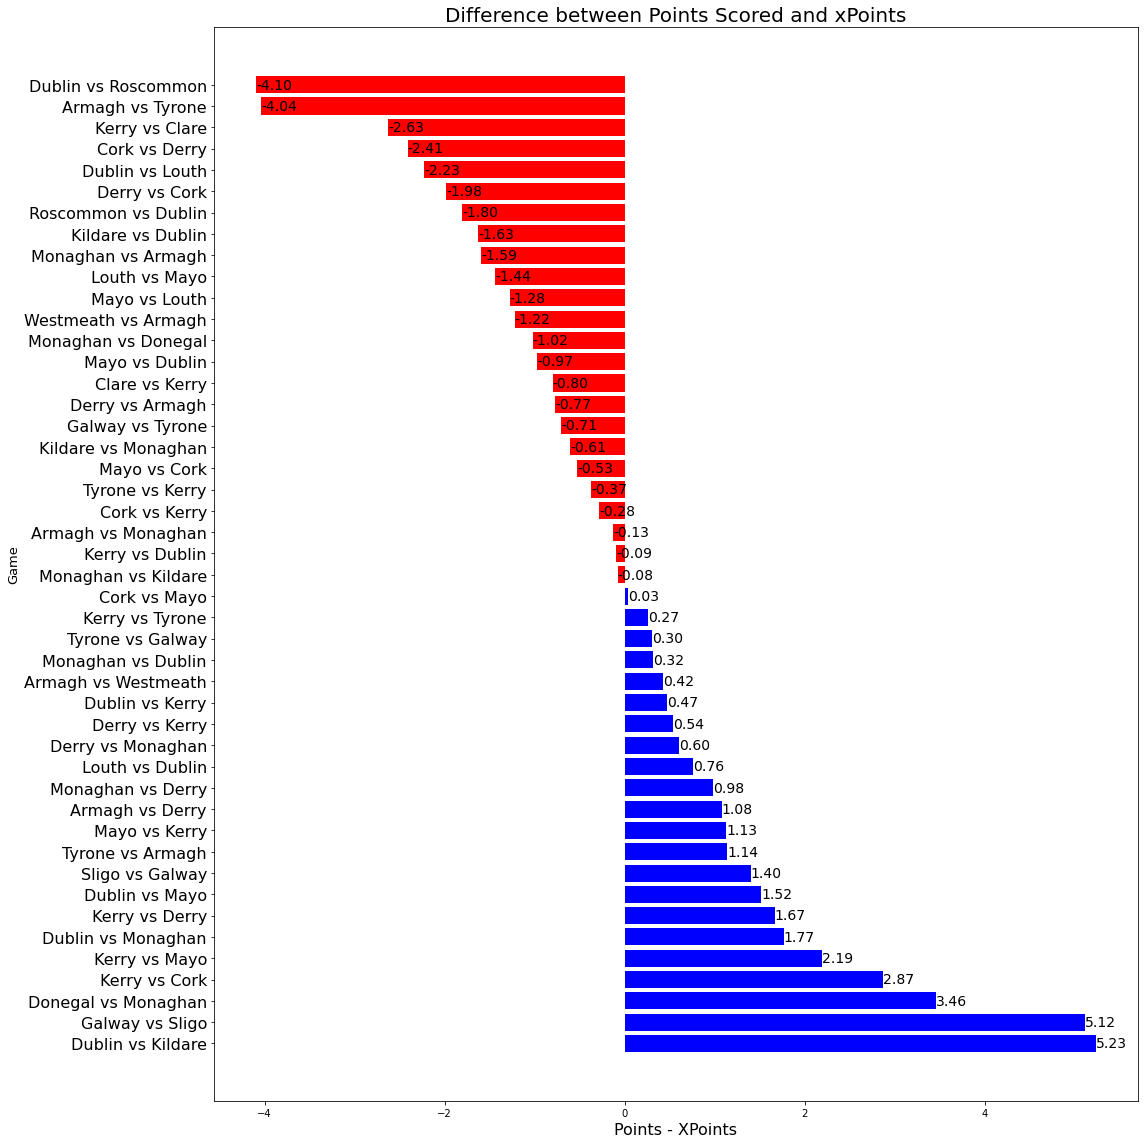

In [107]:
# Set the figure size
plt.figure(figsize=(16, 16))

# Plot the bar chart
bars = plt.barh(range(len(md)), md['Difference'], color=['blue' if x > 0 else 'red' for x in md['Difference']])

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, '%.2f' % width, ha='left', va='center', fontsize=14)

# Set the title and labels
plt.title('Difference between Points Scored and xPoints', fontsize=20)
plt.xlabel('Points - XPoints', fontsize=16)
plt.ylabel('Game', fontsize=13)

# Set the y-axis labels
plt.yticks(range(len(md)), md['Match'], fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


In [108]:
# Define conditions for overperformance and underperformance
conditions = [
    (md['Difference'] > 0),
    (md['Difference'] < 0)
]

# Define values to assign based on conditions
values = ['Overperformed', 'Underperformed']

# Assign values based on conditions
md['Performance'] = np.select(conditions, values, default='Neutral')

In [109]:
md

,Game,TeamName,Opposition,Shots,Score,xP_adv,xPoints,Difference,Match,Performance
14,All Ireland Group R2,Dublin,Kildare,28,22,16.766676,17.817610,5.233324,Dublin vs Kildare,Overperformed
38,Connaught Final,Galway,Sligo,25,20,14.883443,15.418784,5.116557,Galway vs Sligo,Overperformed
21,All Ireland Group R3,Donegal,Monaghan,27,19,15.537348,17.151718,3.462652,Donegal vs Monaghan,Overperformed
15,All Ireland Group R2,Kerry,Cork,17,14,11.131648,11.388785,2.868352,Kerry vs Cork,Overperformed
6,All Ireland Group R1,Kerry,Mayo,27,17,14.811109,13.929675,2.188891,Kerry vs Mayo,Overperformed
35,All Ireland Semi Final,Dublin,Monaghan,24,17,15.232302,15.520368,1.767698,Dublin vs Monaghan,Overperformed
36,All Ireland Semi Final,Kerry,Derry,26,17,15.333492,16.022636,1.666508,Kerry vs Derry,Overperformed
29,All Ireland Quarter Final,Dublin,Mayo,27,18,16.482841,17.755042,1.517159,Dublin vs Mayo,Overperformed
39,Connaught Final,Sligo,Galway,19,12,10.599669,11.777326,1.400331,Sligo vs Galway,Overperformed
19,All Ireland Group R2,Tyrone,Armagh,23,13,11.859533,12.791107,1.140467,Tyrone vs Armagh,Overperformed


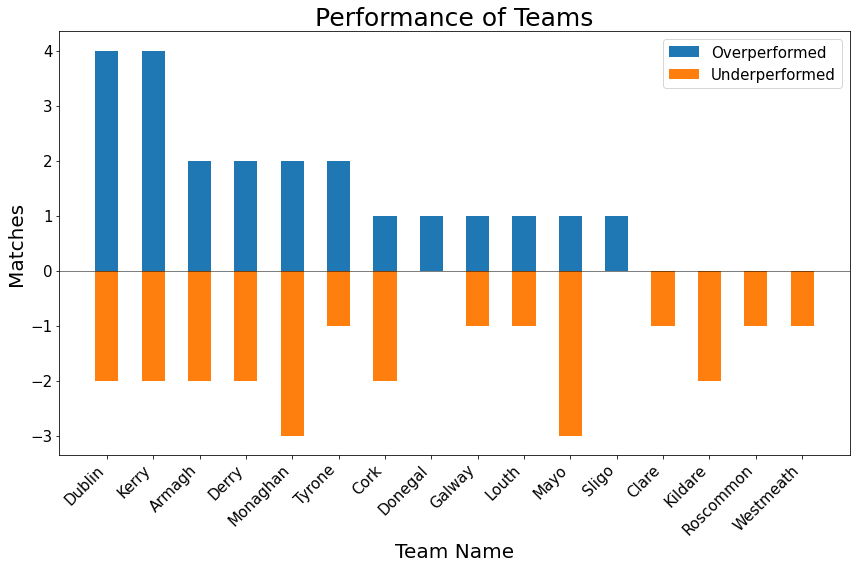

In [110]:
import matplotlib.pyplot as plt

# Group the dataframe by TeamName and Performance and count the occurrences
performance_count = md.groupby(['TeamName', 'Performance']).size().unstack(fill_value=0)

# Calculate the total performance count for each team
performance_count['Total'] = performance_count.sum(axis=1)

# Sort the DataFrame by the Overperformed column in descending order
performance_count = performance_count.sort_values(by='Overperformed', ascending=False)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set the bar width
bar_width = 0.5

# Define the index for the bars
index = range(len(performance_count))

# Plot Overperformed bars
overperformed_bars = plt.bar(index, performance_count['Overperformed'], bar_width, label='Overperformed')

# Plot Underperformed bars below the baseline (0)
underperformed_bars = plt.bar(index, -performance_count['Underperformed'], bar_width, label='Underperformed')

# Set the title and labels
plt.title('Performance of Teams', fontsize = 25)
plt.xlabel('Team Name', fontsize = 20)
plt.ylabel('Matches', fontsize = 20)

# Set the x-axis tick labels to be the team names with increased font size
plt.xticks(index, performance_count.index, rotation=45, ha='right', fontsize=15)

# Set the y-axis tick labels with increased font size
plt.yticks(fontsize=15)

# Add a horizontal line at y=0
plt.axhline(0, color='black', linewidth=0.5)

# Add a legend
plt.legend()
plt.legend(fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()


## Using ChatGPT

In [111]:
df

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,...,108.209144,23.543052,0,1,0,3,0,29.075525,0,0.450275
1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,...,139.269476,49.399014,1,1,1,3,1,-43.293866,0,0.840780
1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,...,118.155430,27.262060,1,1,0,3,0,31.944078,1,0.846579
1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,...,130.320843,53.299923,1,0,0,3,0,-32.356145,1,0.944841


In [112]:
# Define the coordinates of the fixed point
fixed_point = (145, 44)

# Calculate the differences in coordinates for each point
diff_x = df['stand_x'] - fixed_point[0]
diff_y = df['stand_y'] - fixed_point[1]

# Calculate the angle using arctan2 function
angles = np.arctan2(diff_y, diff_x)

# Convert angles from radians to degrees
angles_deg = np.degrees(angles)

# Add the angles to a new column 'Angle' in the DataFrame
df['Angle'] = angles_deg

In [113]:
df

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,...,23.543052,0,1,0,3,0,29.075525,0,0.450275,-150.924475
1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,...,49.399014,1,1,1,3,1,-43.293866,0,0.840780,136.706134
1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,...,27.262060,1,1,0,3,0,31.944078,1,0.846579,-148.055922
1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,...,53.299923,1,0,0,3,0,-32.356145,1,0.944841,147.643855


In [115]:
# Import necessary libraries


# Load your data into a DataFrame
# Assume your data is stored in a CSV file called 'shots.csv'


# Perform data preprocessing and feature engineering as needed
# For example, you might calculate distance to goal and angle to goal

# Split the data into features (X) and target variable (y)
X = df[['Shot_Distance', 'Pressure_Value', 'Angle', 'Position_Value', 'Foot_Value']]
y = df['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train your model (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6444444444444445
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.46      0.51        89
           1       0.68      0.76      0.72       136

    accuracy                           0.64       225
   macro avg       0.62      0.61      0.61       225
weighted avg       0.64      0.64      0.64       225



## Predicting using KNN

In [116]:
df

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,...,23.543052,0,1,0,3,0,29.075525,0,0.450275,-150.924475
1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,...,49.399014,1,1,1,3,1,-43.293866,0,0.840780,136.706134
1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,...,27.262060,1,1,0,3,0,31.944078,1,0.846579,-148.055922
1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,...,53.299923,1,0,0,3,0,-32.356145,1,0.944841,147.643855


In [117]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Assuming df is your DataFrame
# Extract x and y coordinates
X = df[['stand_x', 'stand_y']].values

# Initialize NearestNeighbors with n_neighbors=11 to include the point itself
nn = NearestNeighbors(n_neighbors=11, metric='euclidean')
nn.fit(X)

# Find nearest neighbors for each point
distances, indices = nn.kneighbors(X)

# Calculate average of df.Score for neighbors
avg_score = []
for neighbor_indices in indices[:, 1:]:  # Exclude the first neighbor (the point itself)
    avg_score.append(df.iloc[neighbor_indices]['Score'].mean())

# Add average score to DataFrame
df['xP_Knn'] = avg_score


In [118]:
df.head()

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2


In [119]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Assuming df is your DataFrame
# Extract x and y coordinates
X = df[['stand_x', 'stand_y']].values

# Initialize lists to store the sums of scores for each k
sum_scores = []

# Loop over values of k from 1 to 20
for k in range(2, 21):
    # Initialize NearestNeighbors with current k value
    nn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    nn.fit(X)

    # Find nearest neighbors for each point
    distances, indices = nn.kneighbors(X)

    # Calculate average of df.Score for neighbors
    avg_score = []
    for neighbor_indices in indices[:, 1:]:  # Exclude the first neighbor (the point itself)
        avg_score.append(df.iloc[neighbor_indices]['Score'].mean())

    # Calculate sum of scores for the current k value
    sum_score = sum(avg_score)
    sum_scores.append(sum_score)

    # Print the result for the current value of k
    print(f"k is {k}: Sum of scores is {sum_score}")

# Find the optimal k value with the highest sum of scores
optimal_k = np.argmax(sum_scores) + 1  # Add 1 to convert from index to k value

print("Optimal k value:", optimal_k)


k is 2: Sum of scores is 660.0
k is 3: Sum of scores is 673.0
k is 4: Sum of scores is 672.3333333333331
k is 5: Sum of scores is 678.5
k is 6: Sum of scores is 672.0000000000001
k is 7: Sum of scores is 671.1666666666669
k is 8: Sum of scores is 673.2857142857135
k is 9: Sum of scores is 678.375
k is 10: Sum of scores is 678.4444444444478
k is 11: Sum of scores is 676.8999999999982
k is 12: Sum of scores is 678.1818181818214
k is 13: Sum of scores is 677.3333333333338
k is 14: Sum of scores is 679.2307692307671
k is 15: Sum of scores is 678.1428571428589
k is 16: Sum of scores is 676.3999999999993
k is 17: Sum of scores is 677.5
k is 18: Sum of scores is 677.3529411764705
k is 19: Sum of scores is 676.8888888888905
k is 20: Sum of scores is 677.4736842105278
Optimal k value: 13


In [120]:
from sklearn.metrics import mean_squared_error

# Assuming y_true contains the true target values and y_pred contains the predicted target values
# y_true should be the actual values of df.Score and y_pred should be the values stored in df.xP_Knn
y_true = df['Score']  # True target values
y_pred = df['xP_Knn']  # Predicted target values

# Compute Mean Squared Error
mse = mean_squared_error(y_true, y_pred)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.23356761565836295


In [121]:
from sklearn.model_selection import cross_val_score

# Define a range of k values
k_values = range(1, 21)

# Track the mean cross-validated score for each k value
mean_scores = []

# Loop over k values
for k in k_values:
    # Initialize kNN model with current k value
    knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    
    # Compute cross-validated scores
    scores = cross_val_score(knn, X, cv=5, scoring='neg_mean_squared_error')  # Using mean squared error as an example
    
    # Calculate mean score
    mean_score = -scores.mean()  # Take the negative because cross_val_score returns negative mean squared error
    mean_scores.append(mean_score)
    
    # Print mean score for current k value
    print("Mean Score for k =", k, ":", mean_score)

# Find the best k value
best_k = k_values[np.argmax(mean_scores)]

print("\nBest k:", best_k)



Mean Score for k = 1 : nan
Mean Score for k = 2 : nan
Mean Score for k = 3 : nan
Mean Score for k = 4 : nan
Mean Score for k = 5 : nan
Mean Score for k = 6 : nan
Mean Score for k = 7 : nan
Mean Score for k = 8 : nan
Mean Score for k = 9 : nan
Mean Score for k = 10 : nan
Mean Score for k = 11 : nan
Mean Score for k = 12 : nan
Mean Score for k = 13 : nan
Mean Score for k = 14 : nan
Mean Score for k = 15 : nan
Mean Score for k = 16 : nan
Mean Score for k = 17 : nan
Mean Score for k = 18 : nan
Mean Score for k = 19 : nan
Mean Score for k = 20 : nan

Best k: 1


/Users/cathalmcconnell/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/cathalmcconnell/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
  File "/Users/cathalmcconnell/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
TypeError: _score() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/cathalmcconnell/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/cathalmc

In [122]:
knn

NearestNeighbors(metric='euclidean', n_neighbors=20)

In [123]:
df

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,...,0,1,0,3,0,29.075525,0,0.450275,-150.924475,0.4
1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,...,1,1,1,3,1,-43.293866,0,0.840780,136.706134,0.7
1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,...,1,1,0,3,0,31.944078,1,0.846579,-148.055922,0.9
1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,...,1,0,0,3,0,-32.356145,1,0.944841,147.643855,0.8


## Plot Expected Point KNN

In [124]:
x = df.stand_x
y = df.stand_y
value = df.xP_Knn

cats = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120',  '120-130', '130-140', '140-145']

bins = ([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 145], [0, 10, 20, 30, 40, 50, 60, 70, 80, 89])

sums, _, _ = np.histogram2d(x, y, bins=bins, weights=value)
counts, _, _ = np.histogram2d(x, y, bins=bins)
with  np.errstate(divide='ignore', invalid='ignore'):  # divide 0 by 0 results in NaN
    means = (sums / counts) 

test = pd.DataFrame(means)

test = test.T

test = test

In [125]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.300000,0.100000,0.400000,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,0.383333,0.275000,0.293548,0.566667,0.700000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320000,0.355556,0.561111,0.751515,0.750000,0.625000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.408333,0.469643,0.621154,0.755172,0.735000,0.792857
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.576471,0.544444,0.640909,0.827273,0.812903,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.586667,0.637209,0.703774,0.751429,0.850000,0.914286
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.548571,0.409091,0.714286,0.537838,0.600000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0.200000,0.534615,0.333333,0.266667,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.416667,0.350000,NaN,NaN


In [126]:
def draw_map1():

   # fig, ax = plt.subplots()
    fig=plt.figure()
    fig.set_size_inches(28, 24)
    ax=fig.add_subplot(1,1,1)
    


#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="grey")
    plt.plot([0,145],[88,88], color="grey")
    plt.plot([145,145],[88,0], color="grey")
    plt.plot([145,0],[0,0], color="grey")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="grey")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="grey")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="grey")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="grey")
    
            #large rectangle
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="grey",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="grey",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="grey")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="grey")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="grey")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="grey")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="grey")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="grey")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="grey")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="grey")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="grey")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="grey")
    
   # ly921 = [124,30] 
 #   lx921 = [0,30]
  #  plt.plot(lx921,color="grey")
    

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90, color="grey")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="grey")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    M = 9
    N = 15
    data = test
    


    c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.7, cmap=plt.cm.get_cmap('RdYlGn', 10))

    fig.colorbar(c, ax=ax, orientation = 'vertical')
   
    def show_values(pc, fmt="%.3f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.05):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
        
            ax.text(x, y, fmt % (value), ha="right", va="center", color="black", size=30, **kw)

  # Replace this with the actual total count of your data
    show_values(c)
    


    plt.axis('off')

    
    ax.set_title('Attacking >>>>>>>', fontsize = 40)


    plt.xlim(72.5, 145)
    
    #Display Pitch
    plt.show()
    


/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_13895/2415968115.py:130: UserWarning: Warning: converting a masked element to nan.
  ax.text(x, y, fmt % (value), ha="right", va="center", color="black", size=30, **kw)


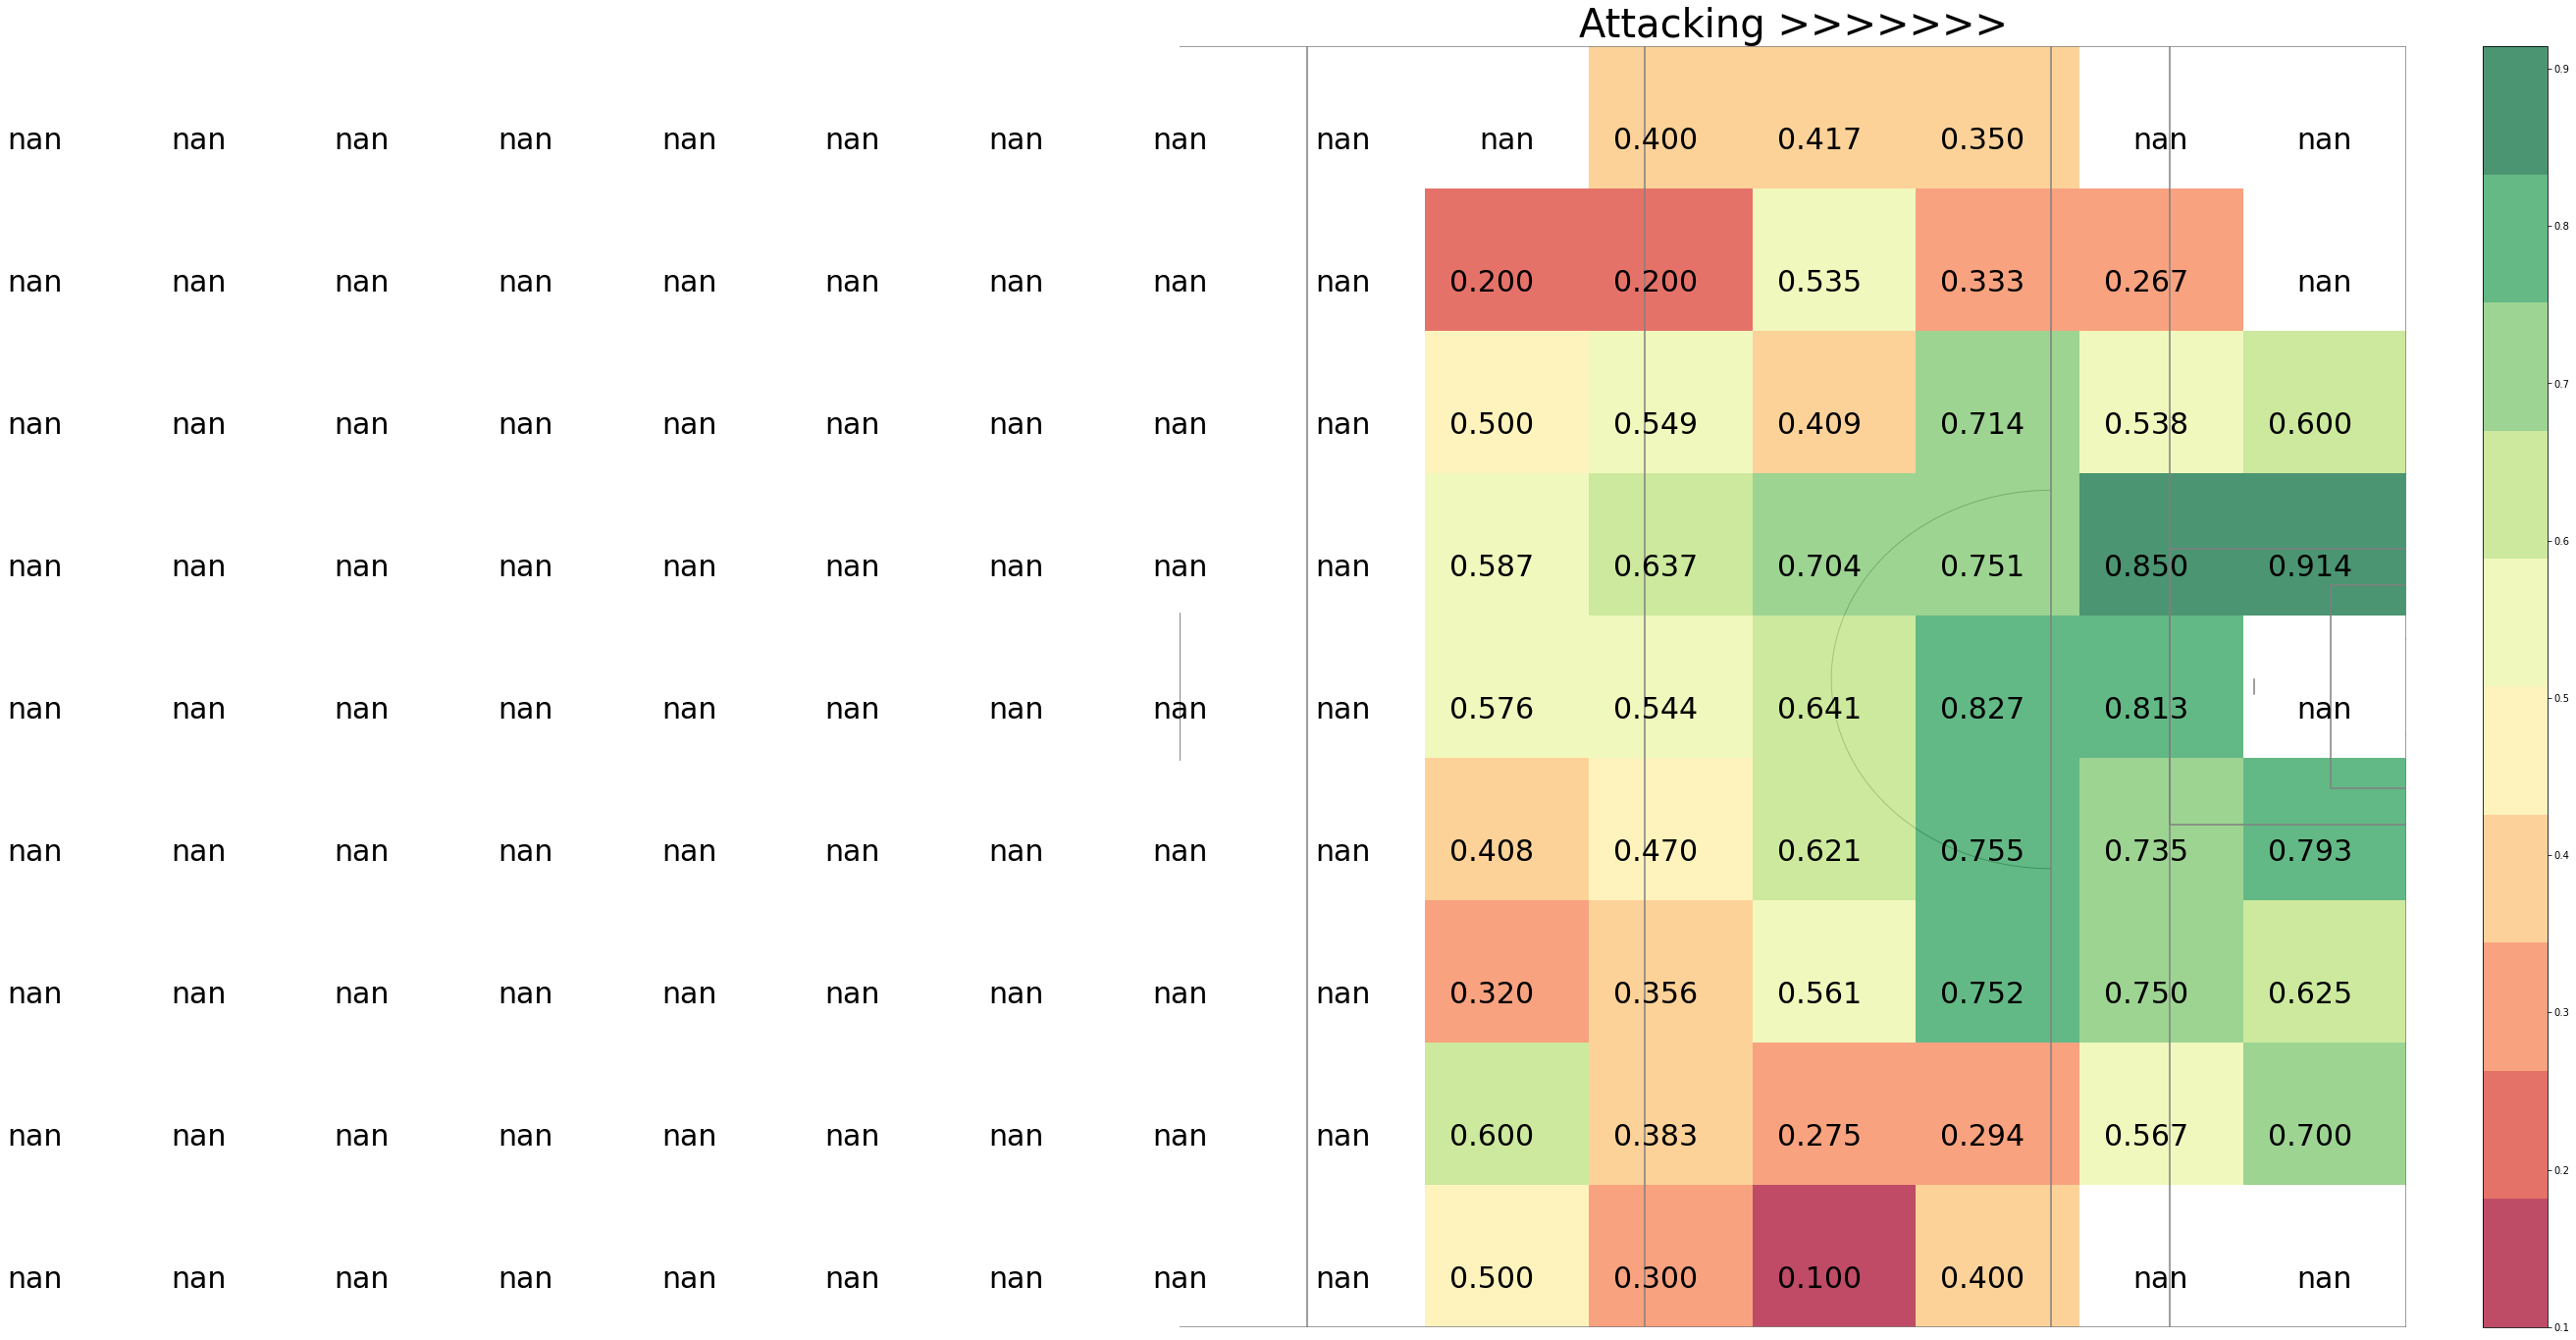

In [127]:
draw_map1()

## Distance and Angle

In [128]:
df

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,...,0,1,0,3,0,29.075525,0,0.450275,-150.924475,0.4
1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,...,1,1,1,3,1,-43.293866,0,0.840780,136.706134,0.7
1121,1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,...,1,1,0,3,0,31.944078,1,0.846579,-148.055922,0.9
1122,1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,...,1,0,0,3,0,-32.356145,1,0.944841,147.643855,0.8


In [129]:
import altair as alt

fig = alt.Chart(df).mark_point().encode(
  x='Shot_Distance',y='Score')

fig + fig.transform_regression('Shot_Distance','Score').mark_line()

alt.LayerChart(...)

In [130]:
md1 = md.head(20)
md2 = md.tail(20)

In [131]:
md1

,Game,TeamName,Opposition,Shots,Score,xP_adv,xPoints,Difference,Match,Performance
14,All Ireland Group R2,Dublin,Kildare,28,22,16.766676,17.817610,5.233324,Dublin vs Kildare,Overperformed
38,Connaught Final,Galway,Sligo,25,20,14.883443,15.418784,5.116557,Galway vs Sligo,Overperformed
21,All Ireland Group R3,Donegal,Monaghan,27,19,15.537348,17.151718,3.462652,Donegal vs Monaghan,Overperformed
15,All Ireland Group R2,Kerry,Cork,17,14,11.131648,11.388785,2.868352,Kerry vs Cork,Overperformed
6,All Ireland Group R1,Kerry,Mayo,27,17,14.811109,13.929675,2.188891,Kerry vs Mayo,Overperformed
35,All Ireland Semi Final,Dublin,Monaghan,24,17,15.232302,15.520368,1.767698,Dublin vs Monaghan,Overperformed
36,All Ireland Semi Final,Kerry,Derry,26,17,15.333492,16.022636,1.666508,Kerry vs Derry,Overperformed
29,All Ireland Quarter Final,Dublin,Mayo,27,18,16.482841,17.755042,1.517159,Dublin vs Mayo,Overperformed
39,Connaught Final,Sligo,Galway,19,12,10.599669,11.777326,1.400331,Sligo vs Galway,Overperformed
19,All Ireland Group R2,Tyrone,Armagh,23,13,11.859533,12.791107,1.140467,Tyrone vs Armagh,Overperformed


In [132]:
md2

,Game,TeamName,Opposition,Shots,Score,xP_adv,xPoints,Difference,Match,Performance
33,All Ireland Quarter Final,Tyrone,Kerry,22,12,12.368004,11.231457,-0.368004,Tyrone vs Kerry,Underperformed
22,All Ireland Group R3,Mayo,Cork,21,11,11.527210,8.800425,-0.527210,Mayo vs Cork,Underperformed
24,All Ireland Preliminary Quarter Final,Kildare,Monaghan,21,13,13.605097,12.639917,-0.605097,Kildare vs Monaghan,Underperformed
5,All Ireland Group R1,Galway,Tyrone,28,16,16.707274,14.595811,-0.707274,Galway vs Tyrone,Underperformed
45,Ulster Final,Derry,Armagh,27,15,15.769357,15.273642,-0.769357,Derry vs Armagh,Underperformed
42,Munster Final,Clare,Kerry,28,15,15.797676,16.134325,-0.797676,Clare vs Kerry,Underperformed
31,All Ireland Quarter Final,Mayo,Dublin,20,11,11.971242,11.691170,-0.971242,Mayo vs Dublin,Underperformed
23,All Ireland Group R3,Monaghan,Donegal,31,17,18.019344,16.902593,-1.019344,Monaghan vs Donegal,Underperformed
11,All Ireland Group R1,Westmeath,Armagh,22,10,11.221468,11.595521,-1.221468,Westmeath vs Armagh,Underperformed
18,All Ireland Group R2,Mayo,Louth,24,14,15.276064,15.827822,-1.276064,Mayo vs Louth,Underperformed


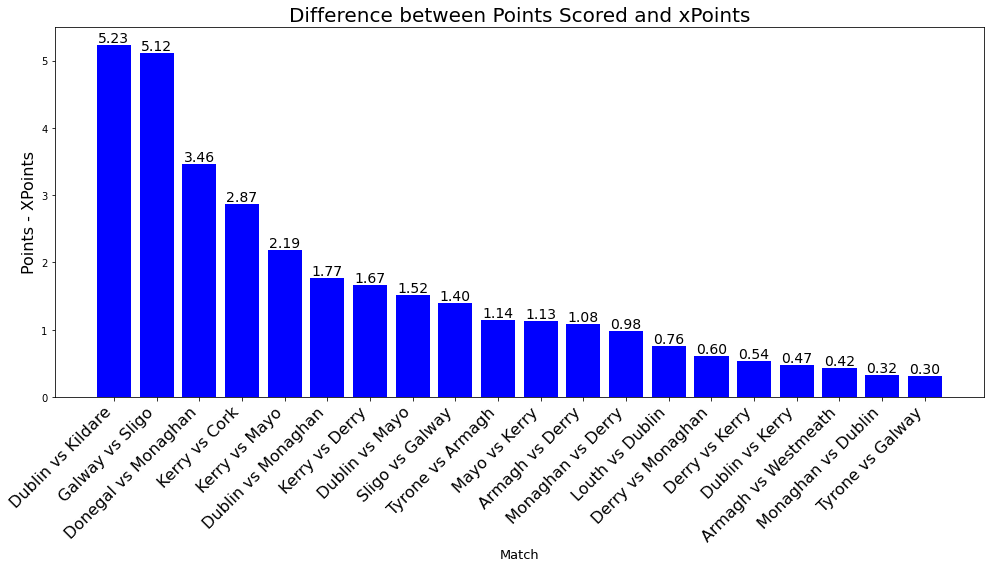

In [133]:


# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the bar chart
bars = plt.bar(range(len(md1)), md1['Difference'], color=['blue' if x > 0 else 'red' for x in md1['Difference']])

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom', fontsize=14)

# Set the title and labels
plt.title('Difference between Points Scored and xPoints', fontsize=20)
plt.xlabel('Match', fontsize=13)
plt.ylabel('Points - XPoints', fontsize=16)

# Set the x-axis labels
plt.xticks(range(len(md1)), md1['Match'], rotation=45, ha='right', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


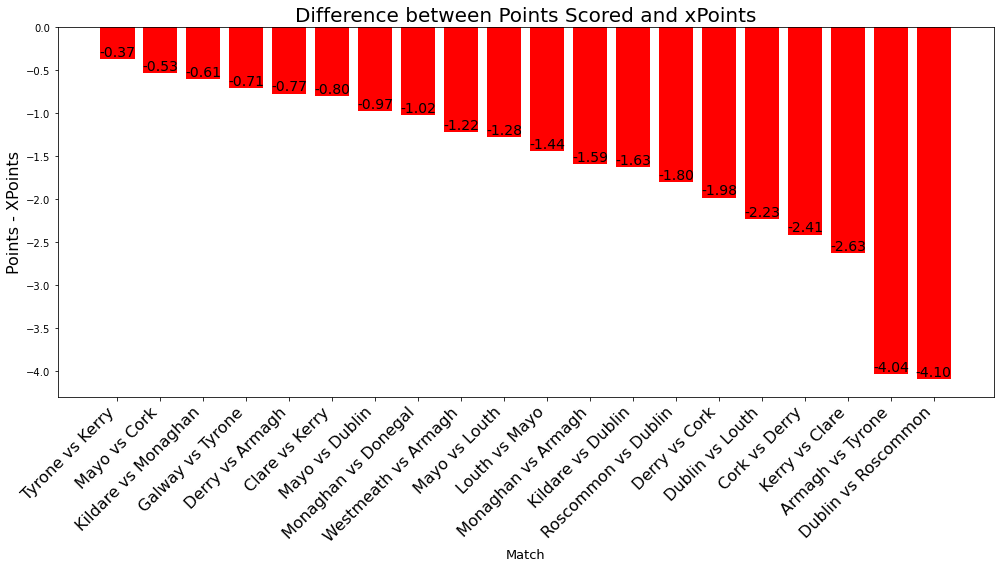

In [134]:


# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the bar chart
bars = plt.bar(range(len(md2)), md2['Difference'], color=['blue' if x > 0 else 'red' for x in md2['Difference']])

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom', fontsize=14)

# Set the title and labels
plt.title('Difference between Points Scored and xPoints', fontsize=20)
plt.xlabel('Match', fontsize=13)
plt.ylabel('Points - XPoints', fontsize=16)

# Set the x-axis labels
plt.xticks(range(len(md2)), md2['Match'], rotation=45, ha='right', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


### Looking at low neighbours

In [135]:
df3 = df2[df2.Neighbour_Points < 4]

In [136]:
len(df3)

128

In [137]:
df3

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,xPoints,Neighbour_Points
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,1,0,0,3,1,64.553022,1,0.783316,0.500000,2.0
10,11,58,2023-05-07,Connaught Final,Sligo,Galway,1st,21,blocked,Miss,...,0,1,1,3,1,-70.049615,0,0.626250,0.666667,3.0
11,12,59,2023-05-07,Connaught Final,Sligo,Galway,1st,22,fortyfive,Score,...,1,0,0,3,0,-21.595292,1,0.612725,1.000000,2.0
14,16,63,2023-05-07,Connaught Final,Galway,Sligo,1st,30,wide,Miss,...,0,1,1,1,1,-54.900443,0,0.279554,0.333333,3.0
15,17,64,2023-05-07,Connaught Final,Sligo,Galway,1st,31,wide,Miss,...,0,1,0,3,0,46.948290,0,0.546327,0.333333,3.0
21,23,70,2023-05-07,Connaught Final,Galway,Sligo,2nd,40,short,Miss,...,0,0,1,3,1,30.162457,0,0.219458,0.000000,2.0
37,39,86,2023-05-07,Connaught Final,Galway,Sligo,2nd,61,point,Score,...,1,0,1,1,0,-6.238307,0,0.505648,1.000000,3.0
48,50,97,2023-05-07,Munster Final,Kerry,Clare,1st,5,free,Score,...,1,0,0,3,1,22.697465,1,0.928084,0.500000,2.0
51,53,100,2023-05-07,Munster Final,Kerry,Clare,1st,10,wide,Miss,...,0,1,1,1,1,-58.420132,0,0.345222,0.333333,3.0
84,93,141,2023-05-07,Munster Final,Kerry,Clare,2nd,56,wide,Miss,...,0,0,0,3,1,65.588021,0,0.467171,0.000000,1.0


#### Shots per area

In [138]:
x = df3.stand_x
y = df3.stand_y
value = df3.Score
#bins = (np.arange(6), np.arange(6))
#bins = ([0, 20, 40, 60, 80, 100, 120, 144], [0, 20, 40, 60, 88])
cats = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120',  '120-130', '130-140', '140-145']
#bins = ([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 145], [0, 15,  30, 45, 60, 75, 89])
bins = ([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 145], [0, 10, 20, 30, 40, 50, 60, 70, 80, 89])
#bins = (np.arange(0, 5.0001, 2.5), np.arange(0, 5.0001, 2.5))
sums, _, _ = np.histogram2d(x, y, bins=bins, weights=value)
counts, _, _ = np.histogram2d(x, y, bins=bins)
with  np.errstate(divide='ignore', invalid='ignore'):  # divide 0 by 0 results in NaN
    means = (sums / counts) 

test2 = pd.DataFrame(counts)

test2 = test2.T



test2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,10.0,4.0,2.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,1.0,6.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,5.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,2.0,4.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,3.0,1.0,2.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,6.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,5.0,6.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,2.0,0.0,0.0


In [139]:
def draw_map2():
  #  data = data[(data['Action'] == "point") | (data['Action'] == "short") & (data['Player_Name'] == player_name)]
    #data = data[(data['Player_Name'] == player_name)]
 #   good_pass = data[(data['Action'].str.contains("good")) & (data['Player_Name'] == player_name)]
  #  bad_pass = data[(data['Action'].str.contains("bad")) & (data['Player_Name'] == player_name)]
    #action_data = data[(data['Player_Name']==player_name)]
   # fig, ax = plt.subplots()
    fig=plt.figure()
    fig.set_size_inches(20, 20)
    ax=fig.add_subplot(1,1,1)
    


#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="grey")
    plt.plot([0,145],[88,88], color="grey")
    plt.plot([145,145],[88,0], color="grey")
    plt.plot([145,0],[0,0], color="grey")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="grey")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="grey")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="grey")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="grey")
    
            #large rectangle
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="grey",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="grey",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="grey")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="grey")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="grey")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="grey")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="grey")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="grey")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="grey")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="grey")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="grey")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="grey")
    
   # ly921 = [124,30] 
 #   lx921 = [0,30]
  #  plt.plot(lx921,color="grey")
    

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90, color="grey")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="grey")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    M = 9
    N = 15
    data = test2
# sns.heatmap(data)
    c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.6, cmap=plt.cm.get_cmap('RdYlGn', 10))
             # cmap=sns.color_palette("rocket", as_cmap=True))
    #cbplt.colorbar(orientation = 'horizontal', pad=0.1, shrink=1, aspect=20)
    fig.colorbar(c, ax=ax, orientation = 'vertical')
   
    def show_values(pc, **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.05):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, str(int(value)), ha="right", va="center", color="black", size=25, **kw)

  # Replace this with the actual total count of your data
    show_values(c)
    


    #M = 10
    #N = 10
   # data = df2
# sns.heatmap(data)
  #  c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
 #   fig.colorbar(c, ax=ax)
#Tidy Axes
    plt.axis('off')

    
    #fig, ax = plt.subplots()
# the size of A4 paper
    
   # M = 1
   # N = 7
   # data = div
# sns.heatmap(data)
   # c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
   # fig.colorbar(c, ax=ax)
  #  sns.heatmap(div)
    #fig.set_size_inches(11.7, 8.27)
    #sns.kdeplot(data["x1"],data["y1"], shade=True, n_levels=50)
    #sns.set(rc={'figure.figsize':(11.7,8.27)})
   # plt.ylim(0, 88)
    #plt.xlim(0, 145)

    
    ax.set_title('Attacking >>>>>>>', fontsize = 30)

    plt.xlim(40, 145)
    
    #Display Pitch
    plt.show()
    
    #fig.savefig('kerry_possession_success_vgalway.pdf')


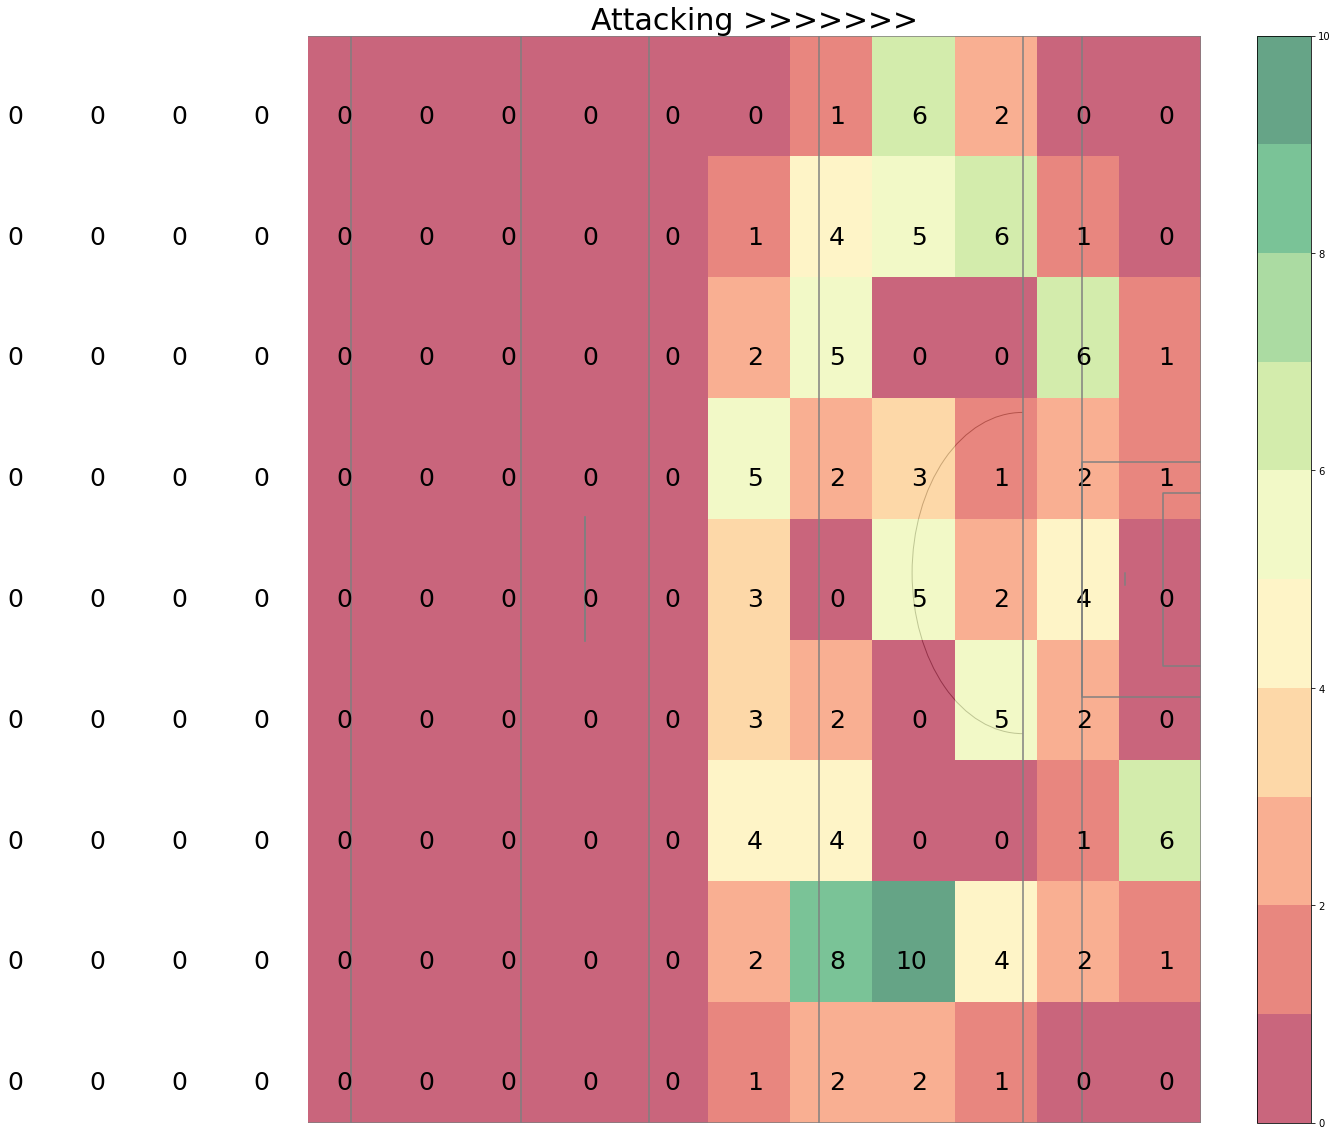

In [140]:
draw_map2()

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

def shot_map(data):
    shot_data = data[(data['Action'] == "point") | (data['Action'] == "free") | (data['Action'] == "fortyfive")
                     | (data['Action'] == "blocked") | (data['Action'] == "fortyfive short") | (data['Action'] == "fortyfive wide") | (data['Action'] == "free short")
                     | (data['Action'] == "free wide") | (data['Action'] == "goal") | (data['Action'] == "goal miss")
                     | (data['Action'] == "offensive mark") | (data['Action'] == "penalty goal")
                     | (data['Action'] == "post") | (data['Action'] == "short") | (data['Action'] == "wide")
                    | (data['Action'] == "offensive mark wide") | (data['Action'] == "free post")]



    # Rest of the pitch lines...
    fig=plt.figure()
    fig.set_size_inches(7, 8.8)
    ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="black")
    plt.plot([0,145],[88,88], color="black")
    plt.plot([145,145],[88,0], color="black")
    plt.plot([145,0],[0,0], color="black")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="black")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="black")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="black")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="black")
    
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="black",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="black",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="black")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="black")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="black")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="black")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="black")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="black")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="black")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="black")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="black")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="black")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="black")
    
  #  ly921 = [124,30] 
   # lx921 = [0,30]
    #plt.plot(lx921,ly921,color="black")

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90,color="black")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="black")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    # Prepare Arcs...
    
    # Draw Arcs...

    # Tidy Axes
    plt.axis('off')


    #sns.kdeplot(data=shot_data, x='x', y='y', cmap='coolwarm', shade=True, levels=20)

    # Scatter plot of shot locations with custom colors and size based on xP_adv
    scatter = sns.scatterplot(data=shot_data, x='x', y='y', hue='xP_adv', palette='coolwarm',
                               s=100, legend=False)

    # Set limits for x-axis
    plt.xlim(70, 145)
    
    # Display Pitch

    # Add color bar for the scatter plot
    
    norm = Normalize(vmin=shot_data['xP_adv'].min(), vmax=shot_data['xP_adv'].max())
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Expected Points (xP)', rotation=270, labelpad=15)

    plt.show()


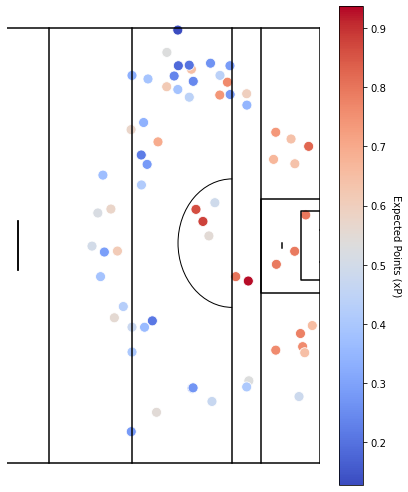

In [142]:
shot_map(df3)

### Save xP file

In [143]:
df.to_excel(folder_path + "Football_Championship_2023_xPoint.xlsx")

In [144]:
df.head()

,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,...,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,...,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,...,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5
2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,...,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,...,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,...,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2
